**Problem:**

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

In [1058]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels
import sklearn


In [1059]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
pd.plotting.register_matplotlib_converters()

### Q1: Read the data as an appropriate Time Series data and plot the data

In [1060]:
#Load both the Csv files as DataFrames
rose = pd.read_csv('Rose.csv')
sparkling = pd.read_csv('Sparkling.csv')

In [1061]:
rose.head(10)

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0
5   1980-06  168.0
6   1980-07  118.0
7   1980-08  129.0
8   1980-09  205.0
9   1980-10  147.0

In [1062]:
rose.shape

(187, 2)

In [1063]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [1064]:
#Convert str into datetime object
rose["YearMonth"] = pd.to_datetime(rose["YearMonth"])
rose.set_index("YearMonth",inplace=True)
rose.index.freq="MS"

In [1065]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [1066]:
rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [1067]:
#Check for missing values
rose.isnull().sum()

Rose    2
dtype: int64

We found two null values in the rose dataframe. We can impute the missing values by forward filling method.

In [1068]:
#impute the missing values by forward filling method.
rose["Rose"]=rose["Rose"].ffill()

In [1069]:
#Validation after null value imputation
rose.isnull().sum()

Rose    0
dtype: int64

**Sparkling dataset**

In [1070]:
sparkling.head(10)

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471
5   1980-06       1377
6   1980-07       1966
7   1980-08       2453
8   1980-09       1984
9   1980-10       2596

In [1071]:
rose.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [1072]:
#shape of spark dataframe
sparkling.shape

(187, 2)

In [1073]:
#Info of spark df
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [1074]:
#Convert str into datetime object
sparkling["YearMonth"]=pd.to_datetime(sparkling["YearMonth"])
sparkling.set_index("YearMonth",inplace=True)
sparkling.index.freq="MS"

In [1075]:
sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [1076]:
sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1077]:
#Check for missing values
sparkling.isnull().sum()

Sparkling    0
dtype: int64

In [1078]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

Found no null values.

<AxesSubplot:xlabel='YearMonth'>

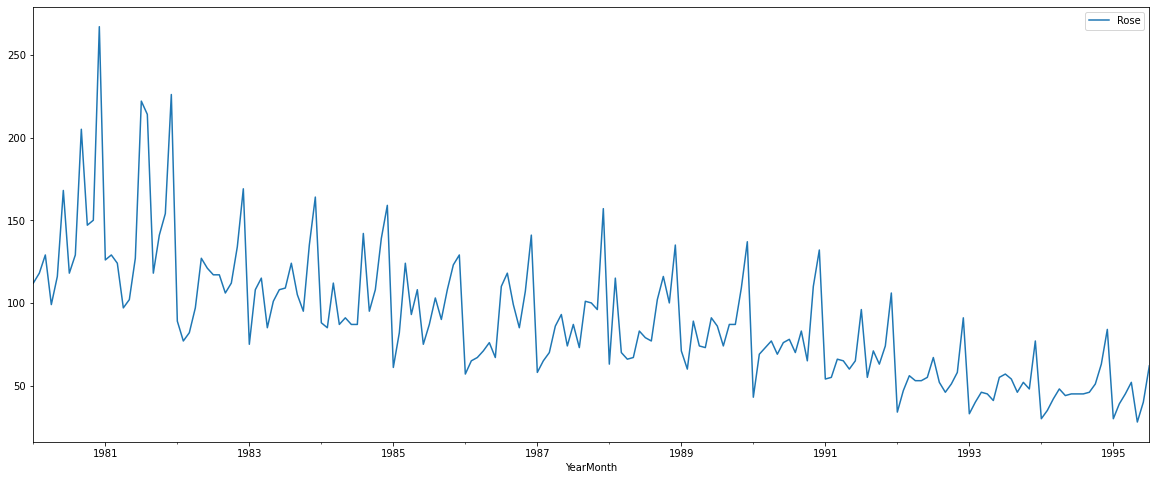

In [1079]:
#Plotting the Rose wine sales data
rose.plot()

<AxesSubplot:xlabel='YearMonth'>

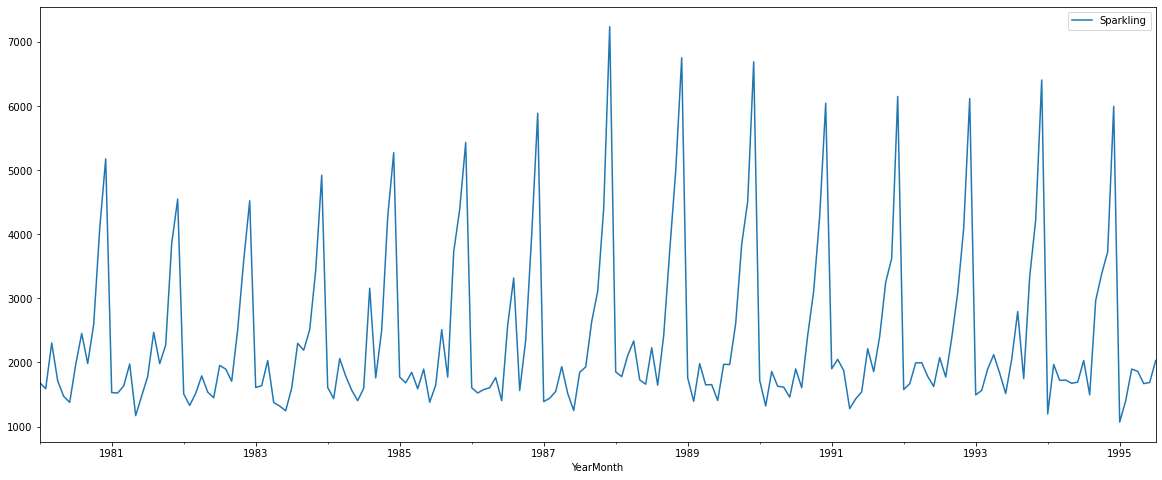

In [1080]:
#Plotting the spark wine sales data
sparkling.plot()

**Observation:**
##### rose dataset:
* We can see that there is a slight downward trend with a seasonal pattern associated as well.
* We observe that the sales of Rose is decreasing with time

#### sparking dataset
* We can see that there is almost a flat trend with a seasonal pattern associated well it.
* We observe that the pattern of the sales of the Sparkling wine is almost the same with respect to time, that is the data seems to be seasonal in nature. 

### Q2: Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**Rose Wine sales:**

In [1081]:
#descriptive statistics of rose
rose.describe()

Rose
count  187.000000
mean    89.909091
std     39.244440
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

The basic measures of descriptive statistics tell us how the Sales have varied across years. But for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

#### Yearly  and monthly Boxplot:

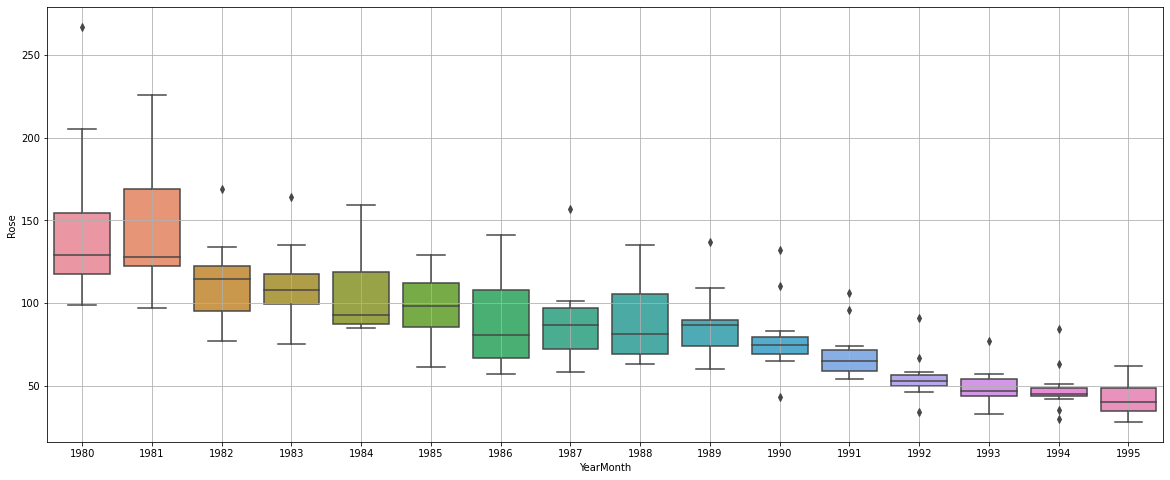

In [1082]:
#Distribution of sale of wine-Rose in each year

sns.boxplot(x = rose.index.year,y = rose['Rose'])
plt.grid();

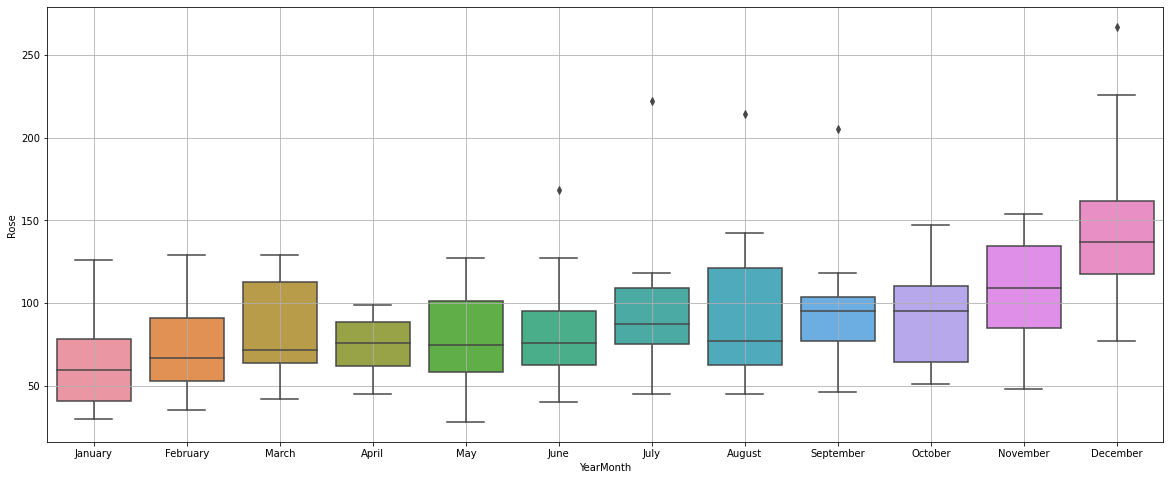

In [1083]:
# Distribution of sale of wine-Rose in each MonthTrend for each month over the years in sale of wine-Rose
sns.boxplot(x = rose.index.month_name(),y = rose['Rose'])
plt.grid();

**Observation:** 
* The yearly boxplots also shows that the Sales have decreased towards the last few years.
* There is a clear distinction of sale within different months spread across various years. The highest such numbers are being recorded in the month of December and November across various years and least in January. 
* Found outliers in both yearly and monthly data.

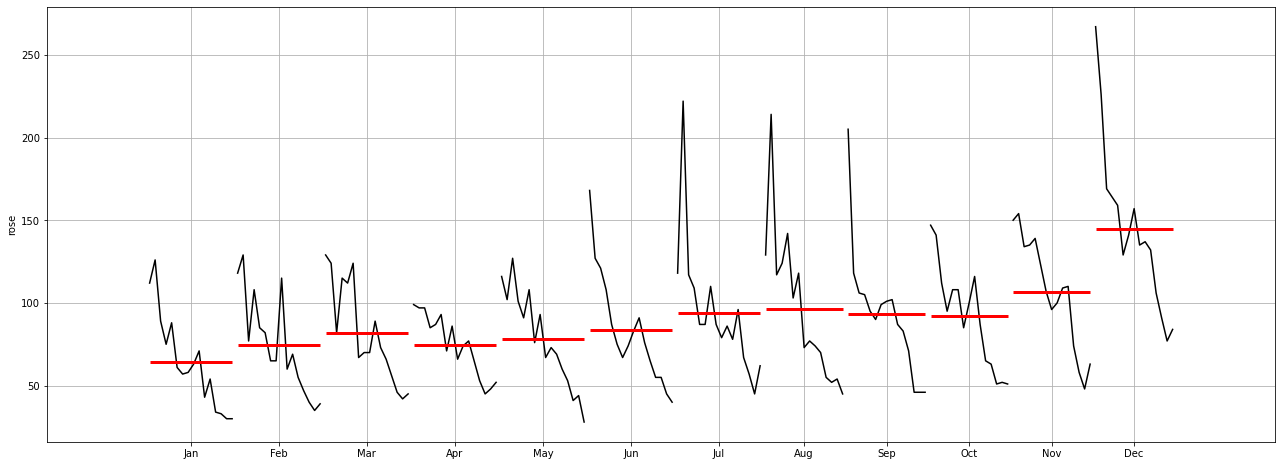

In [1084]:
#Ploting a monthplot of the give Time Series. understand the spread of accidents across different years and within different months across years.
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(rose,ylabel='rose',ax=ax)
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose' wine sale in this case) across various months. The red line is the median value.

In [1085]:
#Plot a graph of monthly RetailSales across years.
Rose_monthly_sales_across_years = pd.pivot_table(rose, values = 'Rose', columns = rose.index.month, index = rose.index.year)
Rose_monthly_sales_across_years

YearMonth     1      2      3     4      5      6      7      8      9   \
YearMonth                                                                 
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994        30.0   35.0   42.0  48.0   44.0   45.0   45.0   45.0   46.0   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

YearMonth     10     11     12  
YearMonth                       
1980       147.0  150.0  267.0  
1981       141.0  154.0  226.0  
1982       112.0  134.0  169.0  
1983        95.0  135.0  164.0  
1984       108.0  139.0  159.0  
1985       108.0  123.0  129.0  
1986        85.0  107.0  141.0  
1987       100.0   96.0  157.0  
1988       116.0  100.0  135.0  
1989        87.0  109.0  137.0  
1990        65.0  110.0  132.0  
1991        63.0   74.0  106.0  
1992        51.0   58.0   91.0  
1993        52.0   48.0   77.0  
1994        51.0   63.0   84.0  
1995         NaN    NaN    NaN

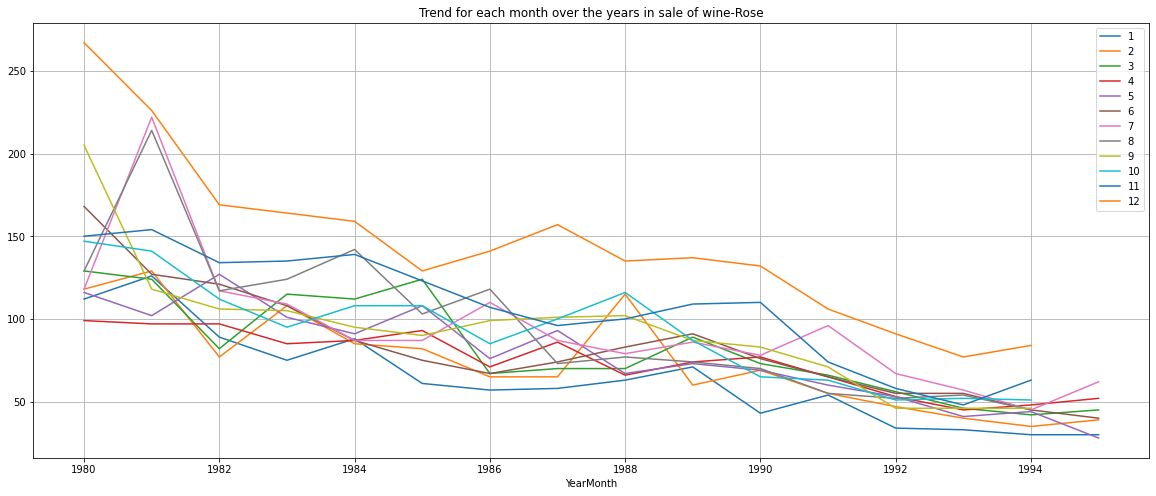

In [1086]:
Rose_monthly_sales_across_years.plot(title="Trend for each month over the years in sale of wine-Rose")
plt.grid()
plt.legend(loc='best');

**Observation:** Overall monthly rose wine sale is also decreasing towards years.

**Sparking wine sales:**

In [1087]:
#descriptive statistics of sparkling wine
sparkling.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

**Observation:** As there is huge difference between 50%, mean and 75% with max value, there must be existance of outliers.

**Yearly and monthly sale Boxplot**

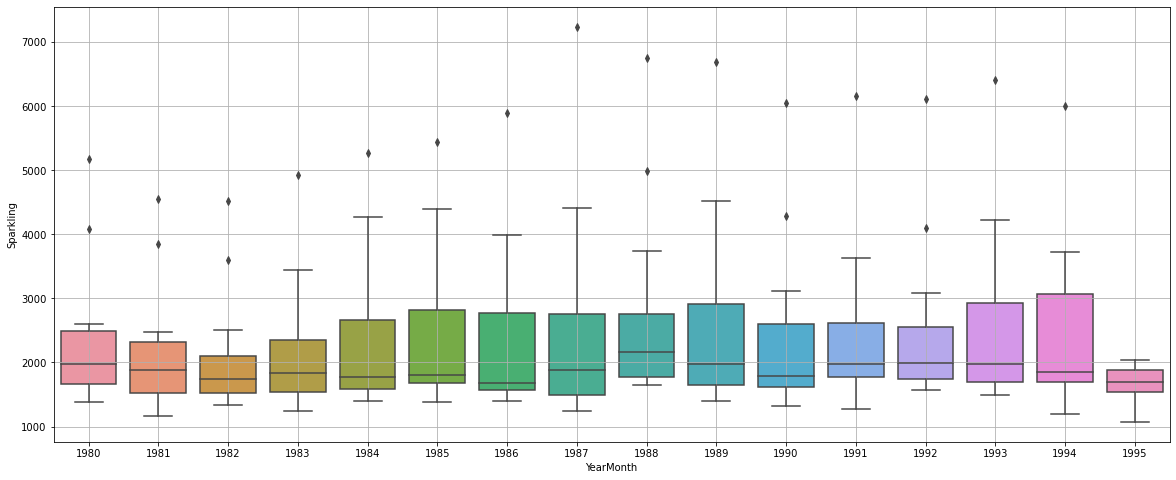

In [1088]:
#Distribution of sale of wine-sparkling in each year

sns.boxplot(x = sparkling.index.year,y = sparkling['Sparkling'])
plt.grid();

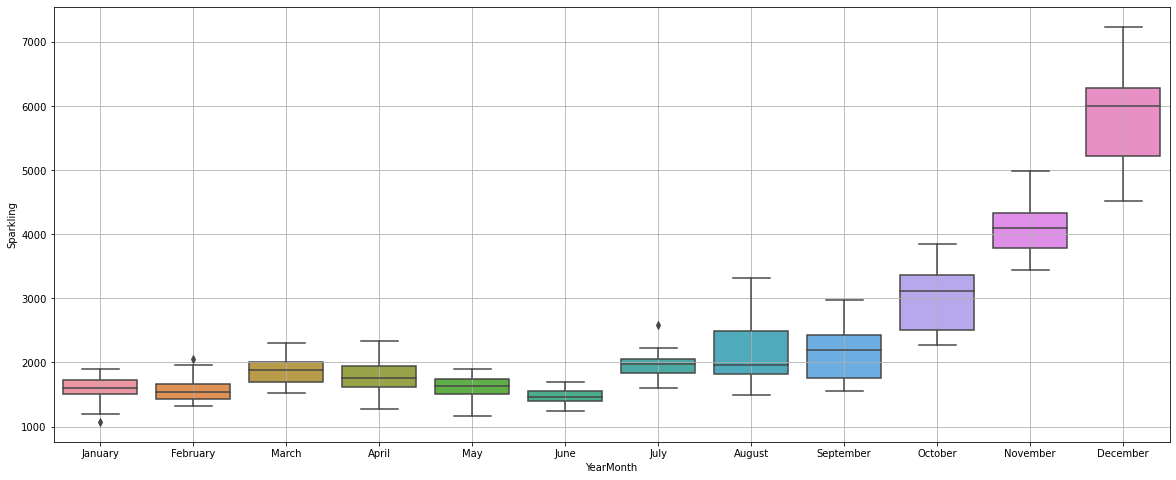

In [1089]:
# Distribution of sale of wine-sparkling in each MonthTrend for each month over the years in sale of wine-sparkling
sns.boxplot(x = sparkling.index.month_name(),y = sparkling['Sparkling'])
plt.grid();

**Observation:** 
* The yearly boxplots also shows that the Sales is almost same last few years.
* There is a clear distinction of sale within different months spread across various years.Sales are gradually increasing after every September till December. The hieghest average sales are being recorded in December and November. 
* The least sales are being recorded in the first seven months every year.least in the month of June 
* Found outliers in both yearly and monthy sale data.

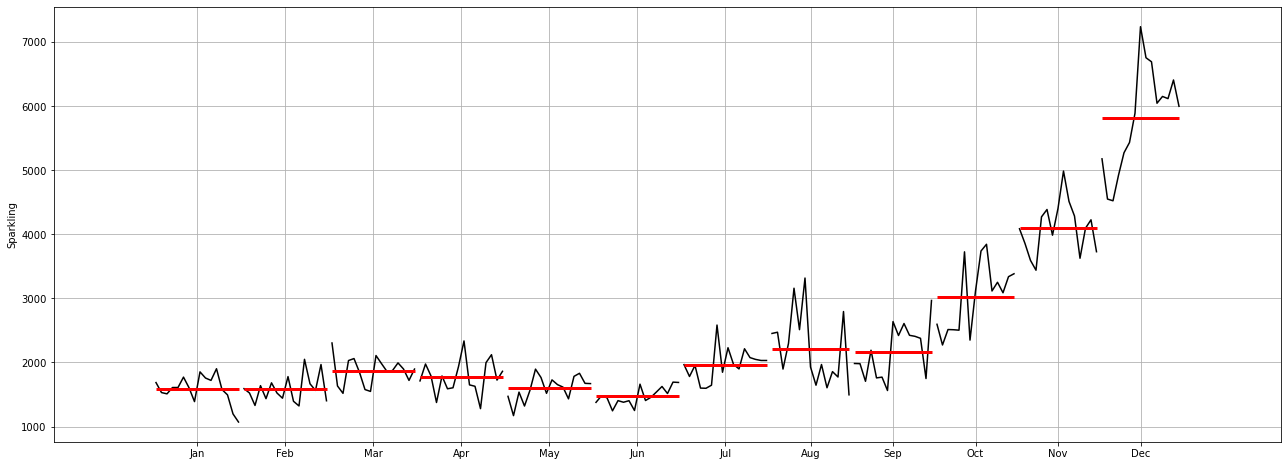

In [1090]:
#Ploting a monthplot of the give Time Series. understand the spread of accidents across different years and within different months across years.
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(sparkling,ylabel='Sparkling',ax=ax)
plt.grid();

In [1091]:
#Plot a graph of monthly Sales across years.
Sparkling_monthly_sales_across_years = pd.pivot_table(sparkling, values = 'Sparkling', columns = sparkling.index.month, index = sparkling.index.year)
Sparkling_monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

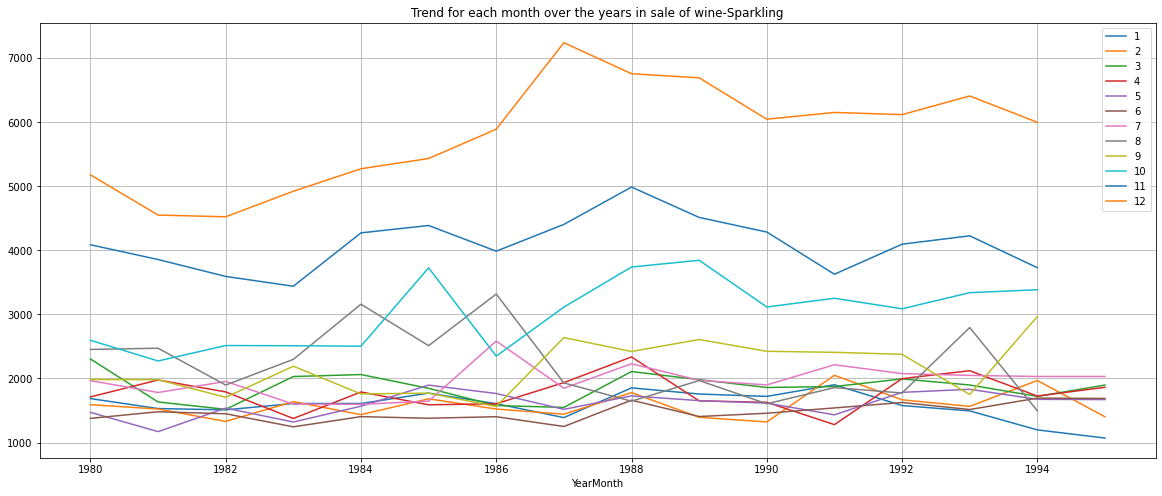

In [1092]:
Sparkling_monthly_sales_across_years.plot(title="Trend for each month over the years in sale of wine-Sparkling")
plt.grid()
plt.legend(loc='best');

**Observation:** Overall monthly rose wine sale is almost same towards years.

**Plotting actual data and rolling mean together(average of 12 months)**

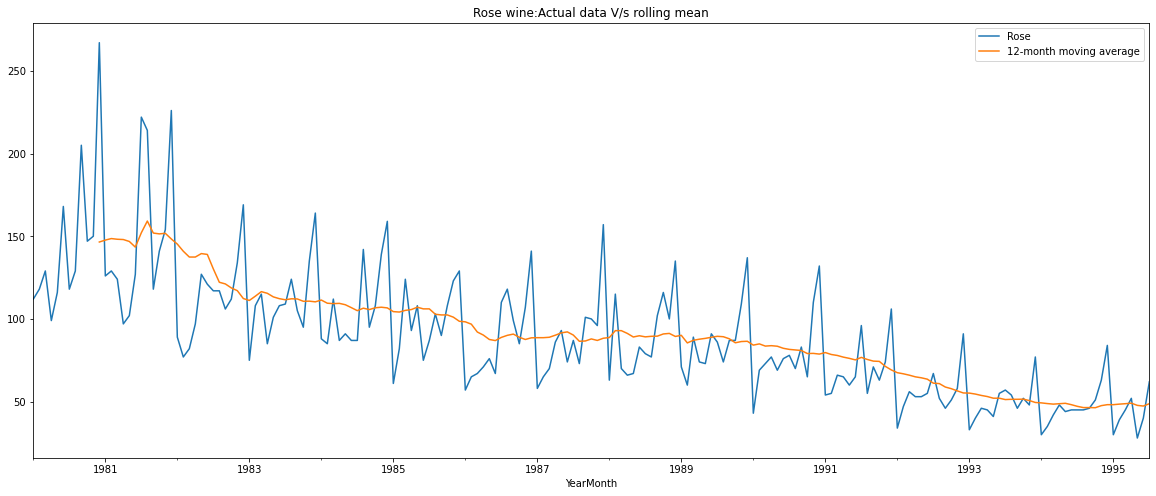

In [1093]:
#Rose Dataset
rose['Rose'].plot(figsize=(20,8))
rose.rolling(window=12).mean()['Rose'].plot(label="12-month moving average",title="Rose wine:Actual data V/s rolling mean")
plt.legend();

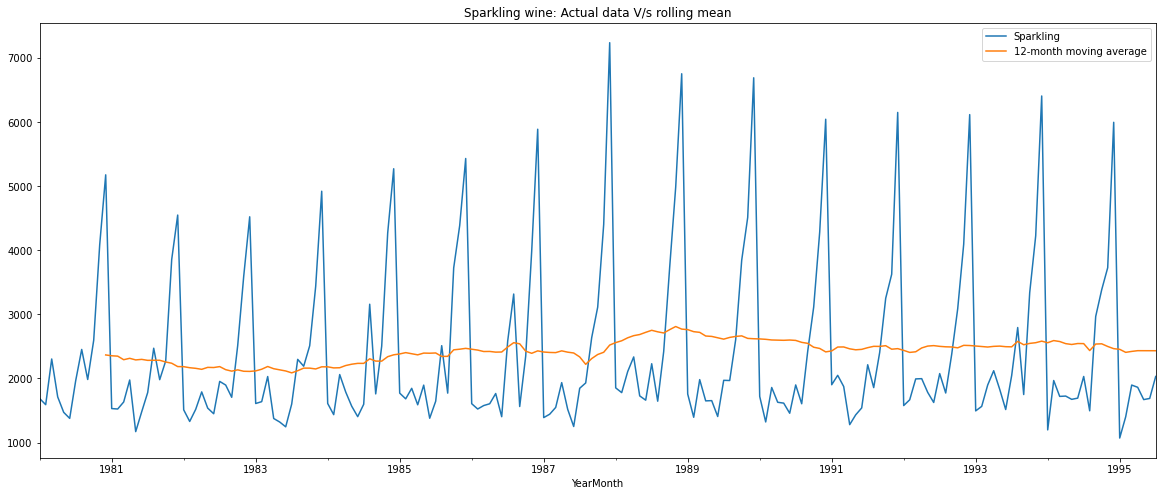

In [1094]:
#Sparkling data
sparkling['Sparkling'].plot(figsize=(20,8))
sparkling.rolling(window=12).mean()['Sparkling'].plot(label="12-month moving average",title="Sparkling wine: Actual data V/s rolling mean")
plt.legend();

**Observation:**
* Hence from the plot we can observe that the mean value of Rose dataset is decreasing over time whereas the for the sparkling dataset, it is almost constant. 
* Now we will filter and remove the trend and cyclic component from each data using Hedrick filter method and then we will decompose the dataset using seasonal decomposition method


**Applying Hodrick-Prescott filter before decomposition**
* Now we will filter and remove the trend and cyclic component from each data using Hodrick-Prescott smoothing parameter. filter method and then we will decompose the dataset using seasonal decomposition method
* The Hodrick–Prescott filter or Hodrick–Prescott decomposition is a mathematical tool that is used in time series analysis and modelling. This filter is mainly useful in removing the cyclic component from time-series data.
* Applying the Hodrick–Prescott filter in time series allows us to obtain a smooth time series from time series that has time series components like trend cycle and noise in large quantities.

In [1095]:
from statsmodels.tsa.filters.hp_filter import hpfilter


#Rose dataset
rose_cycle, rose_trend = hpfilter(rose['Rose'], lamb=1600)

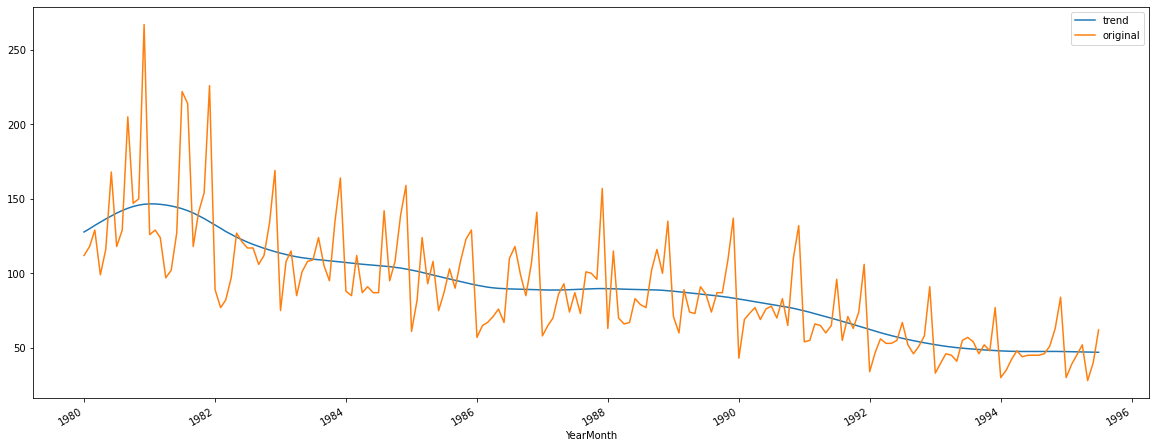

In [1096]:
plt.plot(rose_trend,label="trend")
rose["Rose"].plot(label="original")
plt.legend()
plt.show()

In [1097]:
#Sparkling dataset
sparkle_cycle, sparkle_trend = hpfilter(sparkling['Sparkling'], lamb=1600)

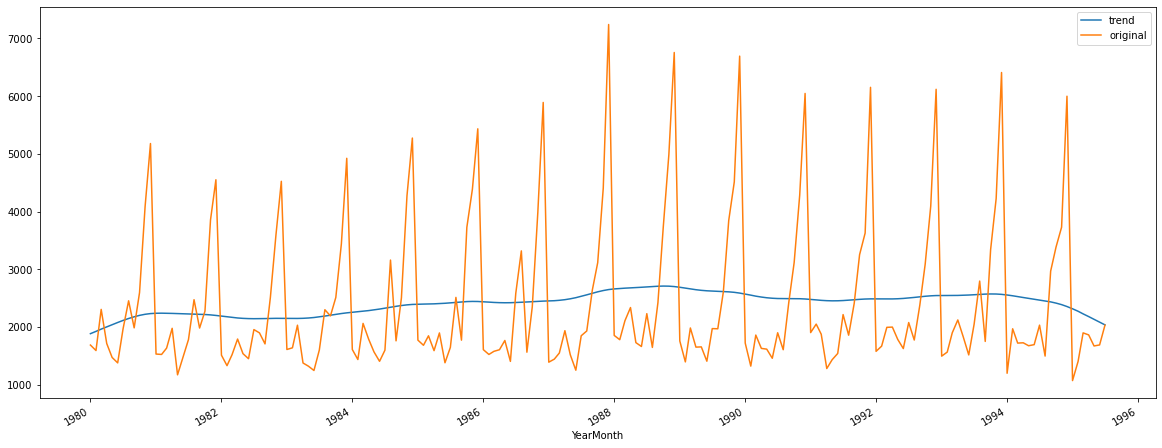

In [1098]:
plt.plot(sparkle_trend,label="trend")
sparkling["Sparkling"].plot(label="original")
plt.legend()
plt.show()

### Seasonal decompose of the time series data
#### Decomposition of Rose-wine sales into Trend, Seasonal and ResidualDistribution of sale of wine-Rose in each year

In [1099]:
from statsmodels.tsa.seasonal import seasonal_decompose

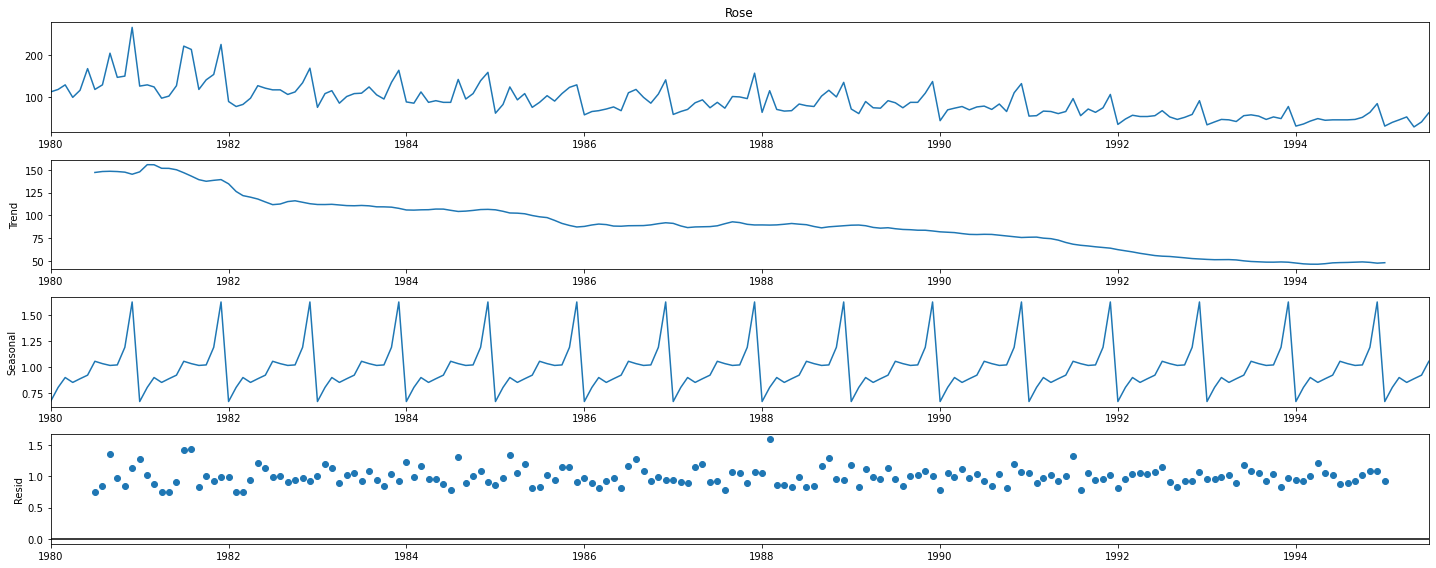

In [1100]:
#Rose wine sales data
result = seasonal_decompose(rose["Rose"], model='multiplicative') 
result.plot();

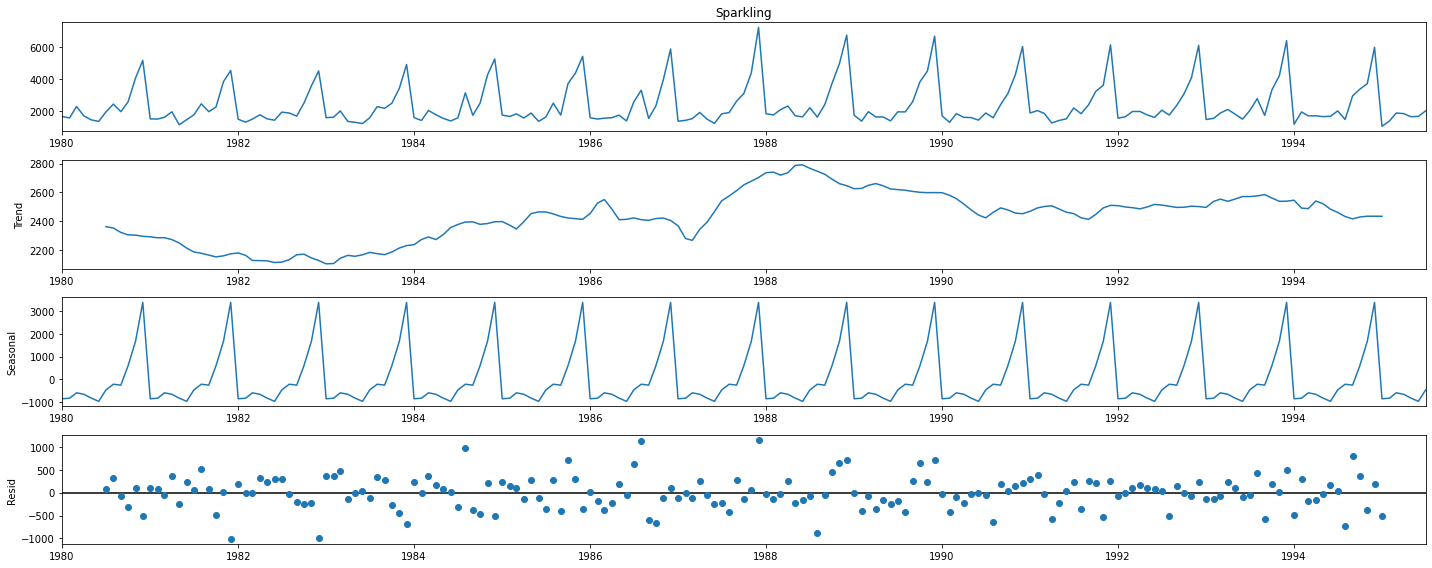

In [1101]:
#Sparkling wine sales data
result = seasonal_decompose(sparkling["Sparkling"], model='additive') 
result.plot();

**Seasonal decomposition plots observations:** 
* The trend factor in the Rose dataset has a decreasing trend whereas the trend for the sparking dataset, initaillay it decreases a bit and then increases again becomes constant after 1990s.So we consider it as the almost constant trend.
* We also observed that both the dataset contains seasonal element in them.
* We found scattered residual component in both the dataset

### Q3: Split the data into training and test. The test data should start in 1991.

In [1102]:
#Rose wine sales data
rose_train = rose[rose.index.year<1991]
rose_test=rose[rose.index.year>=1991]

In [1103]:
#shape of the train and test set of Rose wine
print(rose_train.shape)
print(rose_test.shape)

(132, 1)
(55, 1)


After splitting train and test data set , train data set has 132 records and test has 55 records. We splitted data in almost 70:30 ratio.

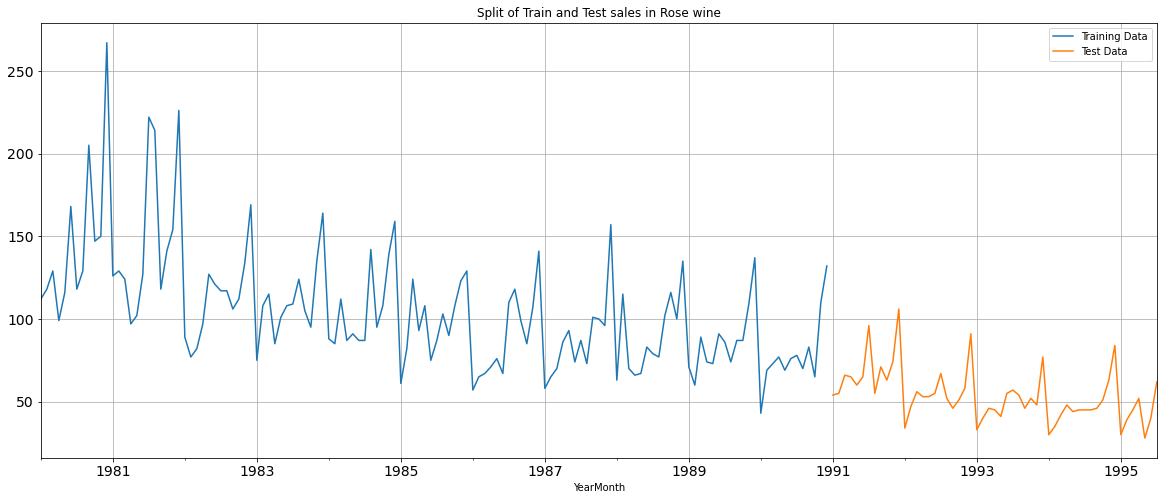

In [1104]:
#plotting train and test split data together
rose_train['Rose'].plot(fontsize=14,title="Split of Train and Test sales in Rose wine")
rose_test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [1105]:
#Sparkling wine sales data
sparkling_train = sparkling[sparkling.index.year<1991]
sparkling_test=sparkling[sparkling.index.year>=1991]

In [1106]:
#shape of the train and test set of Sparkling wine
print(sparkling_train.shape)
print(sparkling_test.shape)

(132, 1)
(55, 1)


After splitting train and test data set , train data set has 132 records and test has 55 records

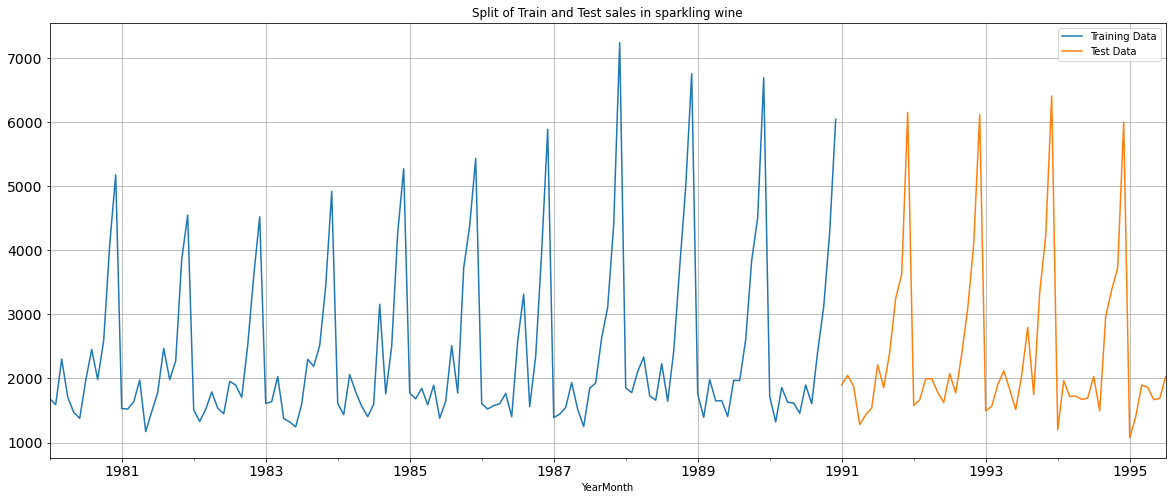

In [1107]:
#plotting train and test split data together
sparkling_train['Sparkling'].plot(fontsize=14,title="Split of Train and Test sales in sparkling wine")
sparkling_test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### Q4: Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Simple Exponential smoothing:

In [1108]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error

**Rose wine sales data:**

In [1109]:
R_SES_train = rose_train.copy()
R_SES_test = rose_test.copy()

In [1110]:
R_model_SES = SimpleExpSmoothing(R_SES_train['Rose'])

In [1111]:
R_model_SES_autofit = R_model_SES.fit(optimized=True)

In [1112]:
R_model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1113]:
R_SES_test['predict'] = R_model_SES_autofit.forecast(steps=len(R_SES_test))
R_SES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  87.104983
1991-02-01  55.0  87.104983
1991-03-01  66.0  87.104983
1991-04-01  65.0  87.104983
1991-05-01  60.0  87.104983

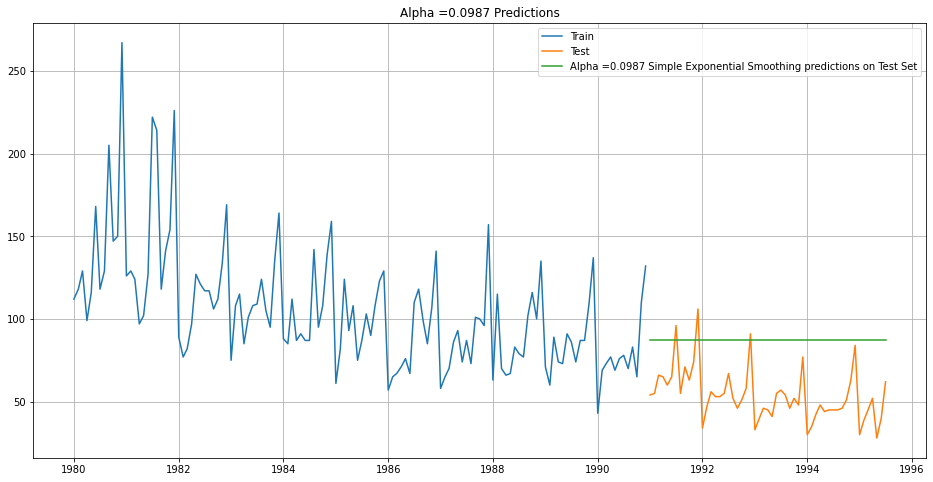

In [1114]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(R_SES_train['Rose'], label='Train')
plt.plot(R_SES_test['Rose'], label='Test')

plt.plot(R_SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

**Model Evaluation for α = 0.0987 : Simple Exponential Smoothing**

In [1115]:
##Rose Test Data RMSE
from sklearn import metrics
R_rmse_model_test_1 = metrics.mean_squared_error(R_SES_test['Rose'],R_SES_test['predict'],squared=False)
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Rose Test Data, RMSE is %3.3f" %(R_rmse_model_test_1))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Rose Test Data, RMSE is 36.817


In [1116]:
R_resultsDf = pd.DataFrame({'Rose Test RMSE': [R_rmse_model_test_1]},index=['Alpha=0.0987,SimpleExponentialSmoothing'])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing       36.816889

**Setting different alpha values.**

* A smaller value (closer to 0) creates a smoother (slowly changing) line similar to a moving average with a large number of periods. 
* A high value for alpha tracks the data more closely by giving more weight to recent data.
* We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [1117]:
# First we will define an empty dataframe to store our values from the loop

resultsDf_1 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_1

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [1118]:
for i in np.arange(0.3,1,0.1):
    R_model_SES_alpha_i = R_model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    R_SES_train['predict',i] = R_model_SES_alpha_i.fittedvalues
    R_SES_test['predict',i] = R_model_SES_alpha_i.forecast(steps=len(R_SES_test))
    R_rmse_model1_train_i = metrics.mean_squared_error(R_SES_train['Rose'],R_SES_train['predict',i],squared=False)
    R_rmse_model1_test_i = metrics.mean_squared_error(R_SES_test['Rose'],R_SES_test['predict',i],squared=False)
    resultsDf_1 = resultsDf_1.append({'Alpha Values':i,'Train RMSE':R_rmse_model1_train_i 
                                      ,'Test RMSE':R_rmse_model1_test_i}, ignore_index=True)
    

C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\1725429620.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_1 = resultsDf_1.append({'Alpha Values':i,'Train RMSE':R_rmse_model1_train_i
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\1725429620.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_1 = resultsDf_1.append({'Alpha Values':i,'Train RMSE':R_rmse_model1_train_i
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\1725429620.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_1 = resultsDf_1.append({'Alpha Values':i,'Train RMSE':R_rmse_model1_train_i
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\1725429620.py:7: FutureWarning: The frame.append method is deprecated and will be remo

**Model Evaluation**

In [1119]:
resultsDf_1.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Train RMSE  Test RMSE
0           0.3   32.470164  47.525251
1           0.4   33.035130  53.787686
2           0.5   33.682839  59.661932
3           0.6   34.441171  64.991324
4           0.7   35.323261  69.718108
5           0.8   36.334596  73.793865
6           0.9   37.482782  77.159094

We found lowest Test RMSE value for alpha=0.0987 and alpha=0.3. So we are ignoring other alpha values.

In [1120]:
R_SES_test.head()

Rose    predict  (predict, 0.3)  (predict, 0.4)  (predict, 0.5)  \
YearMonth                                                                     
1991-01-01  54.0  87.104983       98.669021      105.260413       111.37647   
1991-02-01  55.0  87.104983       98.669021      105.260413       111.37647   
1991-03-01  66.0  87.104983       98.669021      105.260413       111.37647   
1991-04-01  65.0  87.104983       98.669021      105.260413       111.37647   
1991-05-01  60.0  87.104983       98.669021      105.260413       111.37647   

            (predict, 0.6000000000000001)  (predict, 0.7000000000000002)  \
YearMonth                                                                  
1991-01-01                      116.88547                     121.747572   
1991-02-01                      116.88547                     121.747572   
1991-03-01                      116.88547                     121.747572   
1991-04-01                      116.88547                     121.747572   
1991-05-01                      116.88547                     121.747572   

            (predict, 0.8000000000000003)  (predict, 0.9000000000000001)  
YearMonth                                                                 
1991-01-01                      125.92556                     129.366777  
1991-02-01                      125.92556                     129.366777  
1991-03-01                      125.92556                     129.366777  
1991-04-01                      125.92556                     129.366777  
1991-05-01                      125.92556                     129.366777

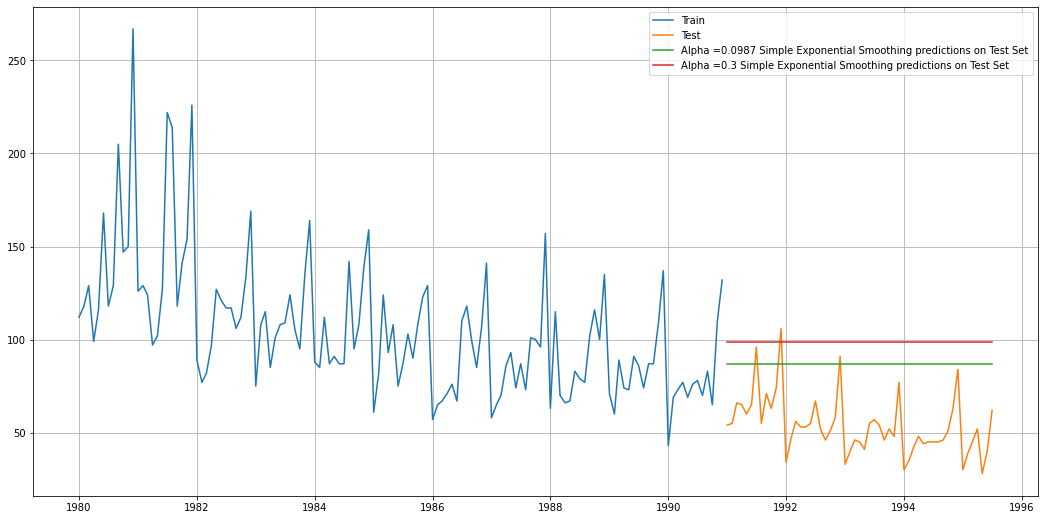

In [1121]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(R_SES_train['Rose'], label='Train')
plt.plot(R_SES_test['Rose'], label='Test')

plt.plot(R_SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.plot(R_SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [1122]:
resultsDf_1_1 = pd.DataFrame({'Rose Test RMSE': [resultsDf_1.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])


In [1123]:
resultsDf_1_1

Rose Test RMSE
Alpha=0.3,SimpleExponentialSmoothing       47.525251

In [1124]:
#appending alpha 0.3 result to the comparing results  dataframe
R_resultsDf = pd.concat([R_resultsDf, resultsDf_1_1])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing       36.816889
Alpha=0.3,SimpleExponentialSmoothing          47.525251

**Sparkling wine sales data:**

In [1125]:
S_SES_train = sparkling_train.copy()
S_SES_test = sparkling_test.copy()

In [1126]:
S_model_SES = SimpleExpSmoothing(S_SES_train['Sparkling'])

In [1127]:
S_model_SES_autofit = S_model_SES.fit(optimized=True)


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [1128]:
S_model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1129]:
S_SES_test['predict'] = S_model_SES_autofit.forecast(steps=len(S_SES_test))
S_SES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  2724.932624
1991-02-01       2049  2724.932624
1991-03-01       1874  2724.932624
1991-04-01       1279  2724.932624
1991-05-01       1432  2724.932624

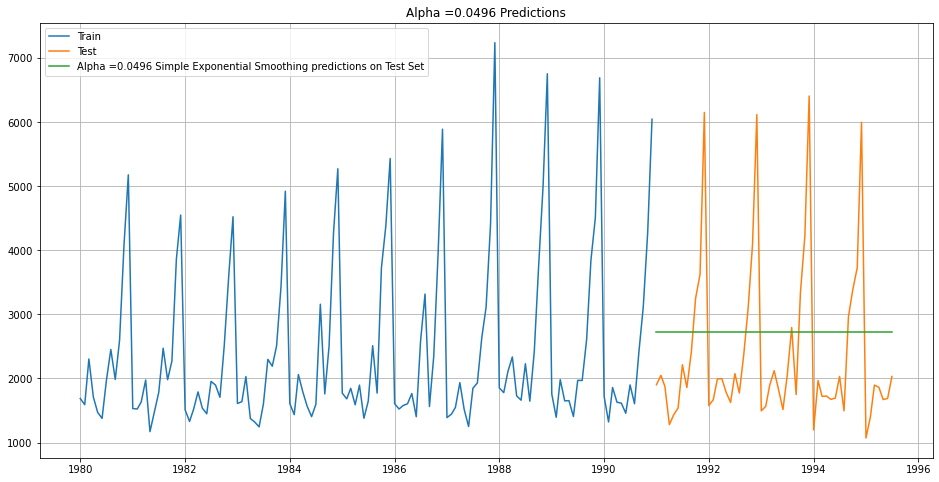

In [1130]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(S_SES_train['Sparkling'], label='Train')
plt.plot(S_SES_test['Sparkling'], label='Test')

plt.plot(S_SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0496 Predictions');

In [1131]:
##Sparkling Test Data RMSE

S_rmse_model_test_1 = metrics.mean_squared_error(S_SES_test['Sparkling'],S_SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Sparkle Test Data, RMSE is %3.3f" %(S_rmse_model_test_1))

For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Sparkle Test Data, RMSE is 1316.035


In [1132]:

S_resultsDf = pd.DataFrame({'Sparkling Test RMSE': [S_rmse_model_test_1]},index=['Alpha=0.0496,SimpleExponentialSmoothing'])
S_resultsDf


Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing          1316.035487

In [1133]:
# First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [1134]:
for i in np.arange(0.3,1,0.1):
    S_model_SES_alpha_i = S_model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    S_SES_train['predict',i] = S_model_SES_alpha_i.fittedvalues
    S_SES_test['predict',i] = S_model_SES_alpha_i.forecast(steps=len(S_SES_test))
    S_rmse_model1_train_i = metrics.mean_squared_error(S_SES_train['Sparkling'],S_SES_train['predict',i],squared=False)
    S_rmse_model1_test_i = metrics.mean_squared_error(S_SES_test['Sparkling'],S_SES_test['predict',i],squared=False)
    resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Train RMSE':S_rmse_model1_train_i 
                                      ,'Test RMSE':S_rmse_model1_test_i}, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\757892080.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Train RMSE':S_rmse_model1_train_i
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\757892080.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Train RMSE':S_rmse_model1_train_i
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\757892080.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Train RMSE':S_rmse_model1_train_i
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\757892080.py:7: FutureWarning: The frame.append method is deprecated and will be removed 

**Model Evaluation:**

In [1135]:
resultsDf_2.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.3  1359.511747  1935.507132
1           0.4  1352.588879  2311.919615
2           0.5  1344.004369  2666.351413
3           0.6  1338.805381  2979.204388
4           0.7  1338.844308  3249.944092
5           0.8  1344.462091  3483.801006
6           0.9  1355.723518  3686.794285

We found lowest Test RMSE value for alpha=0.0496 and alpha=0.3. So we are ignoring other alpha values.

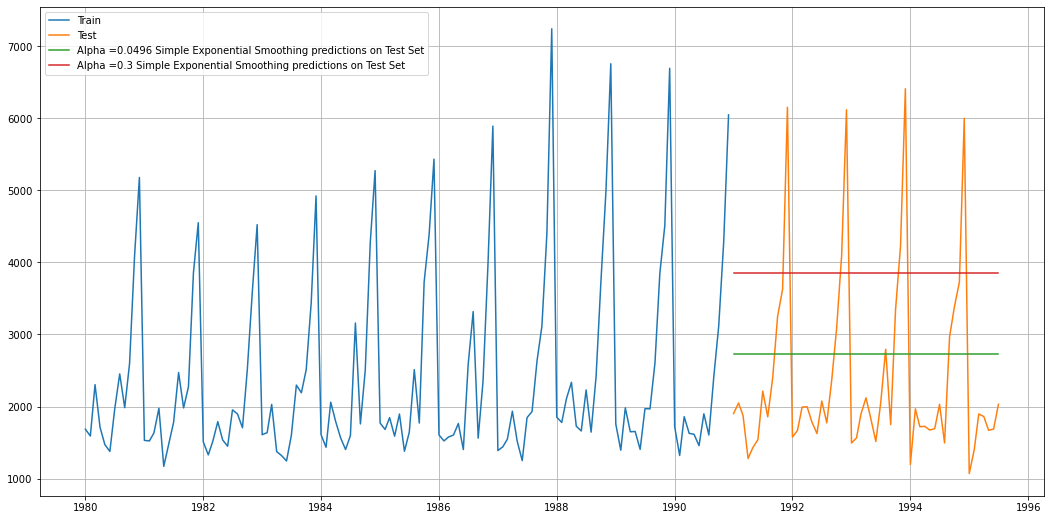

In [1136]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(S_SES_train['Sparkling'], label='Train')
plt.plot(S_SES_test['Sparkling'], label='Test')

plt.plot(S_SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(S_SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [1137]:
resultsDf_2_1 = pd.DataFrame({'Sparkling Test RMSE': [resultsDf_2.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])
resultsDf_2_1

Sparkling Test RMSE
Alpha=0.3,SimpleExponentialSmoothing          1935.507132

In [1138]:
#appending alpha 0.3 result to the comparing results  dataframe
S_resultsDf = pd.concat([S_resultsDf, resultsDf_2_1])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing          1316.035487
Alpha=0.3,SimpleExponentialSmoothing             1935.507132

### Double Exponential Smoothing (Holt's Model):

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

**Rose wine sale data:**

In [1139]:
R_DES_train = rose_train.copy()
R_DES_test = rose_test.copy()

In [1140]:
R_model_DES = Holt(R_DES_train['Rose'])

In [1141]:
R_model_DES_autofit = R_model_DES.fit(optimized=True)

#Finding best parameters
R_model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1142]:
R_DES_test['predict'] = R_model_DES_autofit.forecast(steps=len(R_DES_test))
R_DES_test.head()


Rose    predict
YearMonth                  
1991-01-01  54.0  73.259732
1991-02-01  55.0  72.767150
1991-03-01  66.0  72.274569
1991-04-01  65.0  71.781987
1991-05-01  60.0  71.289405

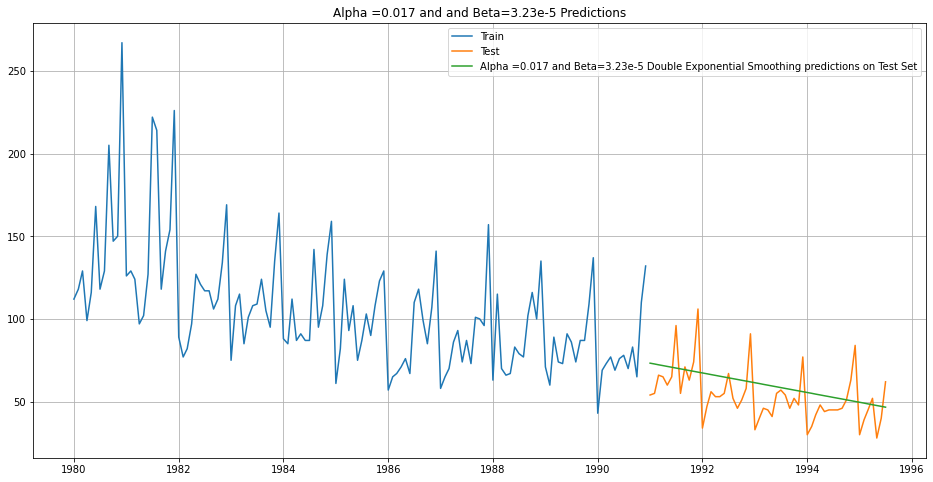

In [1143]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(R_DES_train['Rose'], label='Train')
plt.plot(R_DES_test['Rose'], label='Test')

plt.plot(R_DES_test['predict'], label='Alpha =0.017 and Beta=3.23e-5 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.017 and and Beta=3.23e-5 Predictions');

In [1144]:
##Rose Test Data RMSE
from sklearn import metrics
R_rmse_model_test_2 = metrics.mean_squared_error(R_DES_test['Rose'],R_DES_test['predict'],squared=False)
print("For Alpha =0.017 and Beta=3.23e-5 Double Exponential Smoothing model forecast on the Rose Test Data, RMSE is %3.3f" %(R_rmse_model_test_2))

For Alpha =0.017 and Beta=3.23e-5 Double Exponential Smoothing model forecast on the Rose Test Data, RMSE is 15.715


In [1145]:
results_Df_3 = pd.DataFrame({'Rose Test RMSE': [R_rmse_model_test_2]},index=['Alpha =0.017 and Beta=3.23e-5 Double Exponential Smoothing model'])


In [1146]:
results_Df_3

Rose Test RMSE
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112

In [1147]:
#Including the DES mresult in the result dataframe
R_resultsDf = pd.concat([R_resultsDf, results_Df_3])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112

**Sparkling wine sale data:**

In [1148]:
#Copying sparkling Test train data to a sepearte dataframe
S_DES_train = sparkling_train.copy()
S_DES_test = sparkling_test.copy()
S_model_DES = Holt(S_DES_train['Sparkling'])


In [1149]:

S_model_DES_autofit = S_model_DES.fit(optimized=True)
#Finding best parameters
S_model_DES_autofit.params

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1150]:
S_DES_test['predict'] = S_model_DES_autofit.forecast(steps=len(S_DES_test))
S_DES_test.head()


Sparkling      predict
YearMonth                         
1991-01-01       1902  5221.278699
1991-02-01       2049  5127.886554
1991-03-01       1874  5034.494409
1991-04-01       1279  4941.102264
1991-05-01       1432  4847.710119

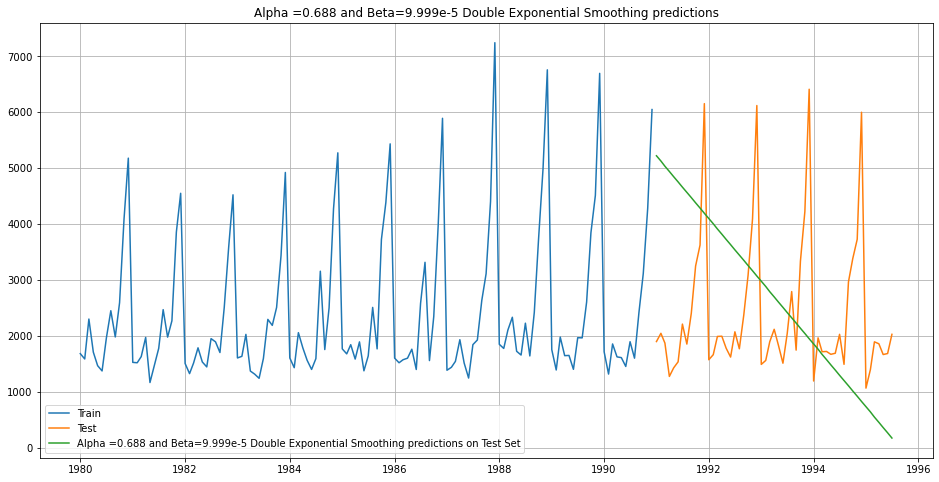

In [1151]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(S_DES_train['Sparkling'], label='Train')
plt.plot(S_DES_test['Sparkling'], label='Test')

plt.plot(S_DES_test['predict'], label='Alpha =0.688 and Beta=9.999e-5 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.688 and Beta=9.999e-5 Double Exponential Smoothing predictions');

In [1152]:
##Rose Test Data RMSE

S_rmse_model_test_2 = metrics.mean_squared_error(S_DES_test['Sparkling'],S_DES_test['predict'],squared=False)
print("For Alpha =0.017 and Beta=3.23 Double Exponential Smoothing model forecast on the Rose Test Data, RMSE is %3.3f" %(S_rmse_model_test_2))

For Alpha =0.017 and Beta=3.23 Double Exponential Smoothing model forecast on the Rose Test Data, RMSE is 2007.239


In [1153]:
## First we will define an empty dataframe to store our values from the loop

S_resultsDf_DES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
S_resultsDf_DES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [1154]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        S_model_DES_alpha_i_j = S_model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        S_DES_train['predict',i,j] = S_model_DES_alpha_i_j.fittedvalues
        S_DES_test['predict',i,j] = S_model_DES_alpha_i_j.forecast(steps=len(S_DES_test))
        
        S_rmse_model2_train = metrics.mean_squared_error(S_DES_train['Sparkling'],S_DES_train['predict',i,j],squared=False)
        
        S_rmse_model2_test = metrics.mean_squared_error(S_DES_test['Sparkling'],S_DES_test['predict',i,j],squared=False)
        
        S_resultsDf_DES = S_resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':S_rmse_model2_train
                                          ,'Test RMSE':S_rmse_model2_test}, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  S_resultsDf_DES = S_resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':S_rmse_model2_train
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  S_resultsDf_DES = S_resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':S_rmse_model2_train
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  S_resultsDf_DES = S_resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':S_rmse_model2_train
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: Fut

C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  S_resultsDf_DES = S_resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':S_rmse_model2_train
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  S_resultsDf_DES = S_resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':S_rmse_model2_train
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  S_resultsDf_DES = S_resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':S_rmse_model2_train
C:\Users\Admin\AppData\Local\Temp\ipykernel_14604\268279726.py:11: Fut

In [1155]:
S_DES_test.T

YearMonth                                           1991-01-01   1991-02-01  \
Sparkling                                          1902.000000  2049.000000   
predict                                            5221.278699  5127.886554   
(predict, 0.3, 0.3)                                4375.375370  4902.217809   
(predict, 0.3, 0.4)                                4723.520613  5490.624497   
(predict, 0.3, 0.5)                                5171.733539  6192.691077   
...                                                        ...          ...   
(predict, 1.0000000000000002, 0.6000000000000001)  7479.950925  8912.901849   
(predict, 1.0000000000000002, 0.7000000000000002)  7583.467265  9119.934529   
(predict, 1.0000000000000002, 0.8000000000000003)  7670.113850  9293.227700   
(predict, 1.0000000000000002, 0.9000000000000001)  7744.142473  9441.284946   
(predict, 1.0000000000000002, 1.0000000000000002)  7808.000000  9569.000000   

YearMonth                                            1991-03-01    1991-04-01  \
Sparkling                                           1874.000000   1279.000000   
predict                                             5034.494409   4941.102264   
(predict, 0.3, 0.3)                                 5429.060248   5955.902688   
(predict, 0.3, 0.4)                                 6257.728381   7024.832265   
(predict, 0.3, 0.5)                                 7213.648614   8234.606152   
...                                                         ...           ...   
(predict, 1.0000000000000002, 0.6000000000000001)  10345.852774  11778.803699   
(predict, 1.0000000000000002, 0.7000000000000002)  10656.401794  12192.869059   
(predict, 1.0000000000000002, 0.8000000000000003)  10916.341550  12539.455401   
(predict, 1.0000000000000002, 0.9000000000000001)  11138.427419  12835.569892   
(predict, 1.0000000000000002, 1.0000000000000002)  11330.000000  13091.000000   

YearMonth                                            1991-05-01    1991-06-01  \
Sparkling                                           1432.000000   1540.000000   
predict                                             4847.710119   4754.317974   
(predict, 0.3, 0.3)                                 6482.745127   7009.587566   
(predict, 0.3, 0.4)                                 7791.936149   8559.040034   
(predict, 0.3, 0.5)                                 9255.563690  10276.521227   
...                                                         ...           ...   
(predict, 1.0000000000000002, 0.6000000000000001)  13211.754624  14644.705548   
(predict, 1.0000000000000002, 0.7000000000000002)  13729.336323  15265.803588   
(predict, 1.0000000000000002, 0.8000000000000003)  14162.569251  15785.683101   
(predict, 1.0000000000000002, 0.9000000000000001)  14532.712365  16229.854838   
(predict, 1.0000000000000002, 1.0000000000000002)  14852.000000  16613.000000   

YearMonth                                            1991-07-01    1991-08-01  \
Sparkling                                           2214.000000   1857.000000   
predict                                             4660.925829   4567.533684   
(predict, 0.3, 0.3)                                 7536.430006   8063.272445   
(predict, 0.3, 0.4)                                 9326.143918  10093.247802   
(predict, 0.3, 0.5)                                11297.478765  12318.436303   
...                                                         ...           ...   
(predict, 1.0000000000000002, 0.6000000000000001)  16077.656473  17510.607398   
(predict, 1.0000000000000002, 0.7000000000000002)  16802.270853  18338.738117   
(predict, 1.0000000000000002, 0.8000000000000003)  17408.796951  19031.910801   
(predict, 1.0000000000000002, 0.9000000000000001)  17926.997311  19624.139784   
(predict, 1.0000000000000002, 1.0000000000000002)  18374.000000  20135.000000   

YearMonth                                            1991-09-01    1991-10-01  \
Sparkling                                          

**Observation:** in the above data we can see that, the prediction of best parameter grid forecasting data is in descending order remaining all the alpha and beta combination predictions are increasing. So we will validate the result with test data RMSE values.

In [1156]:
S_resultsDf_DES

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
1            0.3          0.4  1682.573828  26069.841401
2            0.3          0.5  1771.710791  34401.512440
3            0.3          0.6  1848.576510  42162.748095
4            0.3          0.7  1899.949006  47832.397419
..           ...          ...          ...           ...
59           1.0          0.6  1753.402326  49327.087977
60           1.0          0.7  1825.187155  52655.765663
61           1.0          0.8  1902.013709  55442.273880
62           1.0          0.9  1985.368445  57823.177011
63           1.0          1.0  2077.672157  59877.076519

[64 rows x 4 columns]

In [1157]:
S_resultsDf_DES.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.3          0.3  1592.292788  18259.110704
8            0.4          0.3  1569.338606  23878.496940
1            0.3          0.4  1682.573828  26069.841401
16           0.5          0.3  1530.575845  27095.532414
24           0.6          0.3  1506.449870  29070.722592

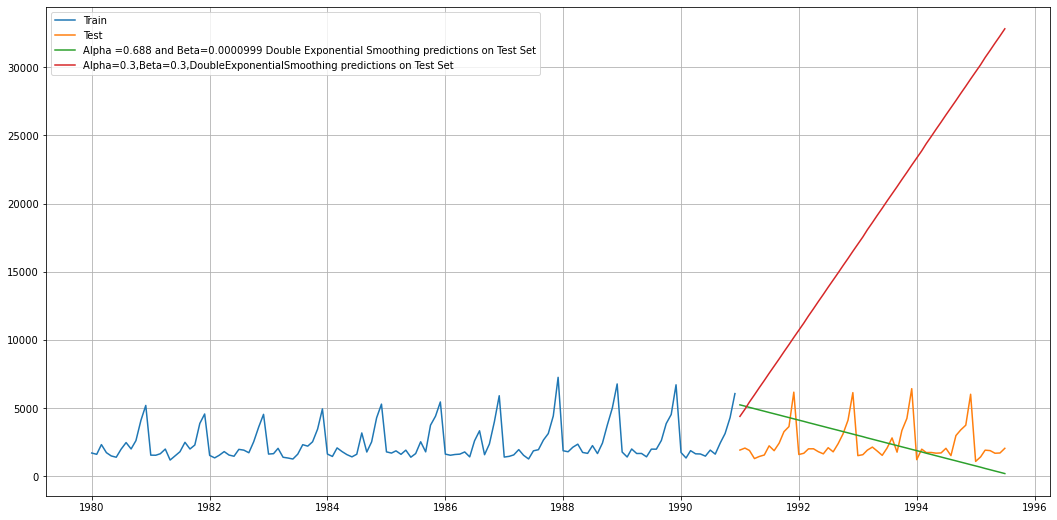

In [1158]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(S_DES_train['Sparkling'], label='Train')
plt.plot(S_DES_test['Sparkling'], label='Test')

plt.plot(S_DES_test['predict'], label='Alpha =0.688 and Beta=0.0000999 Double Exponential Smoothing predictions on Test Set')

plt.plot(S_DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

**Observation:** We are considering the best parameter model with  $\alpha$=0.688 and $\beta$=9.999

In [1159]:
resultsDf_4 = pd.DataFrame({'Sparkling Test RMSE': S_rmse_model_test_2} ,index=['Alpha=0.688,Beta=0.0000999,DoubleExponentialSmoothing'])
S_resultsDf= pd.concat([S_resultsDf, resultsDf_4])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526

### Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

**Rose wine sale data:**

In [1160]:
R_TES_train = rose_train.copy()
R_TES_test = rose_test.copy()

In [1161]:
R_model_TES = ExponentialSmoothing(R_TES_train['Rose'],trend='additive',seasonal='multiplicative')

In [1162]:
R_model_TES_autofit = R_model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [1163]:
R_model_TES_autofit.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1164]:
## Prediction on the test data

R_TES_test['predict'] = R_model_TES_autofit.forecast(steps=len(R_TES_test))
R_TES_test.head()

Rose    predict
YearMonth                  
1991-01-01  54.0  56.321655
1991-02-01  55.0  63.664690
1991-03-01  66.0  69.374024
1991-04-01  65.0  60.435528
1991-05-01  60.0  67.758341

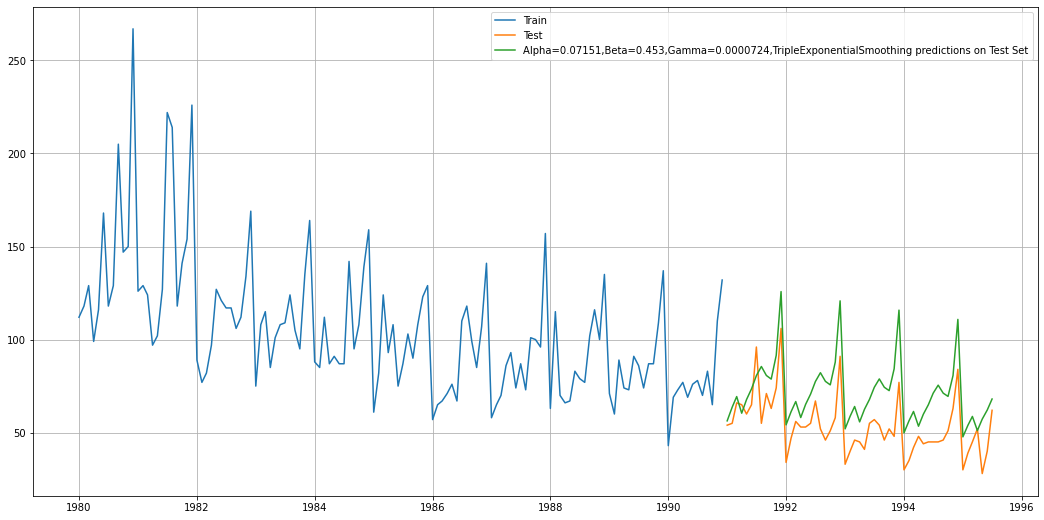

In [1165]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(R_TES_train['Rose'], label='Train')
plt.plot(R_TES_test['Rose'], label='Test')

plt.plot(R_TES_test['predict'], label='Alpha=0.07151,Beta=0.453,Gamma=0.0000724,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [1166]:
## Test Data
R_rmse_model3_test = metrics.mean_squared_error(R_TES_test['Rose'],R_TES_test['predict'],squared=False)

print("For Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(R_rmse_model3_test))


For Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 20.183


In [1167]:
results_Df_5 = pd.DataFrame({'Rose Test RMSE': [R_rmse_model3_test]},index=['Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Triple Exponential Smoothing'])


R_resultsDf = pd.concat([R_resultsDf, results_Df_5])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721

**Sparkling wine sale data:**


In [1168]:
S_TES_train = sparkling_train.copy()
S_TES_test = sparkling_test.copy()


In [1169]:
S_model_TES = ExponentialSmoothing(S_TES_train['Sparkling'],trend='additive',seasonal='multiplicative')

In [1170]:
S_model_TES_autofit = S_model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.


In [1171]:
S_model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1172]:
## Prediction on the test data

S_TES_test['predict'] = S_model_TES_autofit.forecast(steps=len(S_TES_test))
S_TES_test.head()

Sparkling      predict
YearMonth                         
1991-01-01       1902  1587.497468
1991-02-01       2049  1356.394925
1991-03-01       1874  1762.929755
1991-04-01       1279  1656.165933
1991-05-01       1432  1542.002730

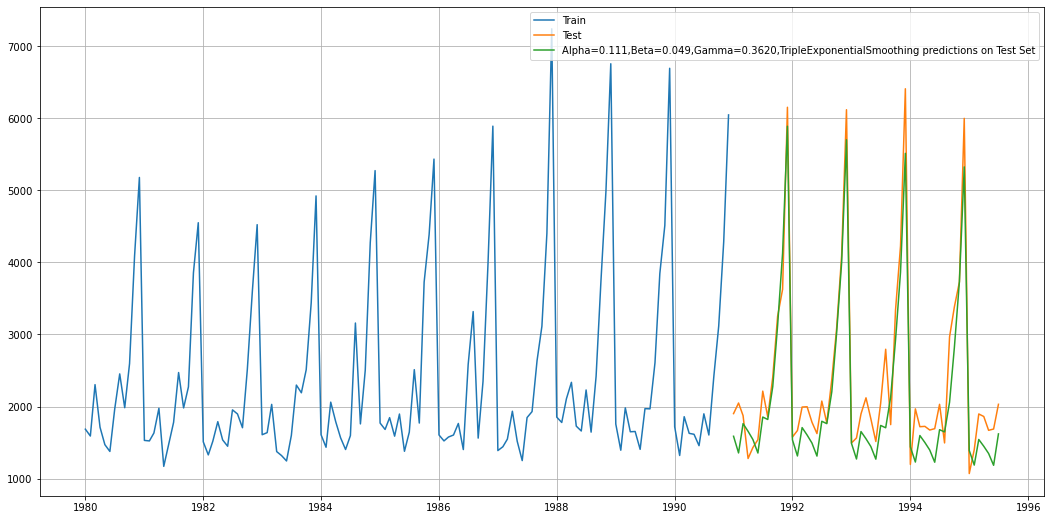

In [1173]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(S_TES_train['Sparkling'], label='Train')
plt.plot(S_TES_test['Sparkling'], label='Test')

plt.plot(S_TES_test['predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.3620,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [1174]:
## Test Data
S_rmse_model3_test = metrics.mean_squared_error(S_TES_test['Sparkling'],S_TES_test['predict'],squared=False)

print("For Alpha=0.111,Beta=0.049,Gamma=0.3620, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(S_rmse_model3_test))


For Alpha=0.111,Beta=0.049,Gamma=0.3620, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 404.287


In [1175]:
results_Df_6 = pd.DataFrame({'Sparkling Test RMSE': [S_rmse_model3_test]},index=['Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Exponential Smoothing'])


S_resultsDf = pd.concat([S_resultsDf, results_Df_6])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809

### Linear Regression Models:

**Note:** For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

**Rose wine sale data:**

In [1176]:
R_train_time = [i+1 for i in range(len(rose_train))]
R_test_time = [i+133 for i in range(len(rose_test))]
print('Training Time instance','\n',R_train_time)
print('Test Time instance','\n',R_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [1177]:
R_LR_train = rose_train.copy()
R_LR_test = rose_test.copy()

In [1178]:
R_LR_train['time'] = R_train_time
R_LR_test['time'] = R_test_time

In [1179]:
print('First few rows of Training Data','\n',R_LR_train.head(),'\n')
print('Last few rows of Training Data','\n',R_LR_train.tail(),'\n')
print('First few rows of Test Data','\n',R_LR_test.head(),'\n')
print('Last few rows of Test Data','\n',R_LR_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [1180]:
from sklearn.linear_model import LinearRegression

In [1181]:
R_lr = LinearRegression()

In [1182]:
R_lr.fit(R_LR_train[['time']],R_LR_train['Rose'].values)

LinearRegression()

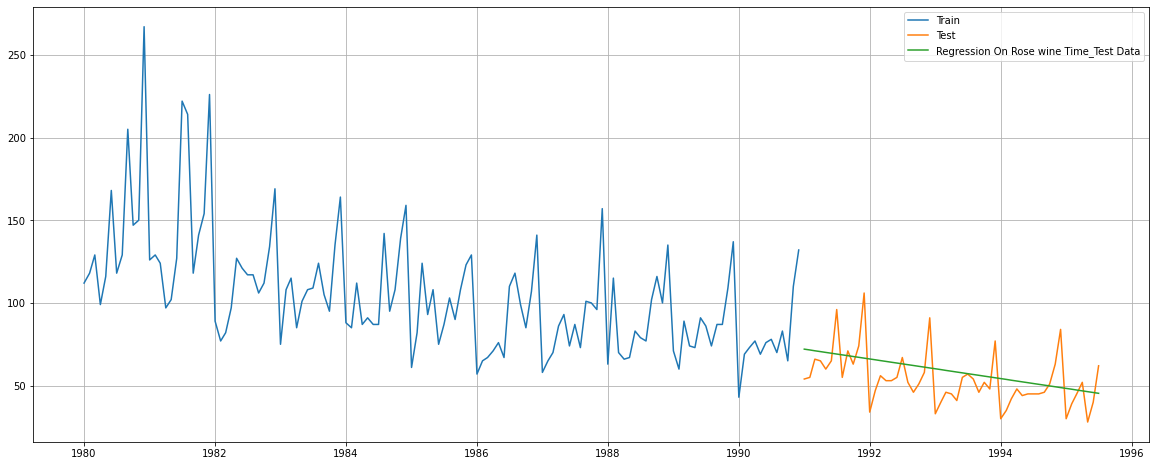

In [1183]:
R_test_predictions_model= R_lr.predict(R_LR_test[['time']])
R_LR_test['RegOnTime'] = R_test_predictions_model

plt.figure(figsize=(20,8))
plt.plot( R_LR_train['Rose'], label='Train')
plt.plot(R_LR_test['Rose'], label='Test')
plt.plot(R_LR_test['RegOnTime'], label='Regression On Rose wine Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [1184]:
#Model Evaluation
## Test Data - RMSE

R_LR_rmse_model_test = metrics.mean_squared_error(R_LR_test['Rose'],R_test_predictions_model,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(R_LR_rmse_model_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.276


In [1185]:
results_Df_7 = pd.DataFrame({'Rose Test RMSE': [R_LR_rmse_model_test]},index=['RegressionOnTime'])


R_resultsDf = pd.concat([R_resultsDf, results_Df_7])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
RegressionOnTime                                         15.275732

**Sparkling wine sale data:**

In [1186]:
S_train_time = [i+1 for i in range(len(sparkling_train))]
S_test_time = [i+133 for i in range(len(sparkling_test))]
print('Training Time instance','\n',S_train_time)
print('Test Time instance','\n',S_test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [1187]:


S_LR_train = sparkling_train.copy()
S_LR_test = sparkling_test.copy()

S_LR_train['time'] = S_train_time
S_LR_test['time'] = S_test_time

print('First few rows of Training Data','\n',S_LR_train.head(),'\n')
print('Last few rows of Training Data','\n',S_LR_train.tail(),'\n')
print('First few rows of Test Data','\n',S_LR_test.head(),'\n')
print('Last few rows of Test Data','\n',S_LR_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.



In [1188]:
S_lr = LinearRegression()


S_lr.fit(S_LR_train[['time']],S_LR_train['Sparkling'].values)


S_test_predictions_model= S_lr.predict(S_LR_test[['time']])
S_LR_test['RegOnTime'] = S_test_predictions_model


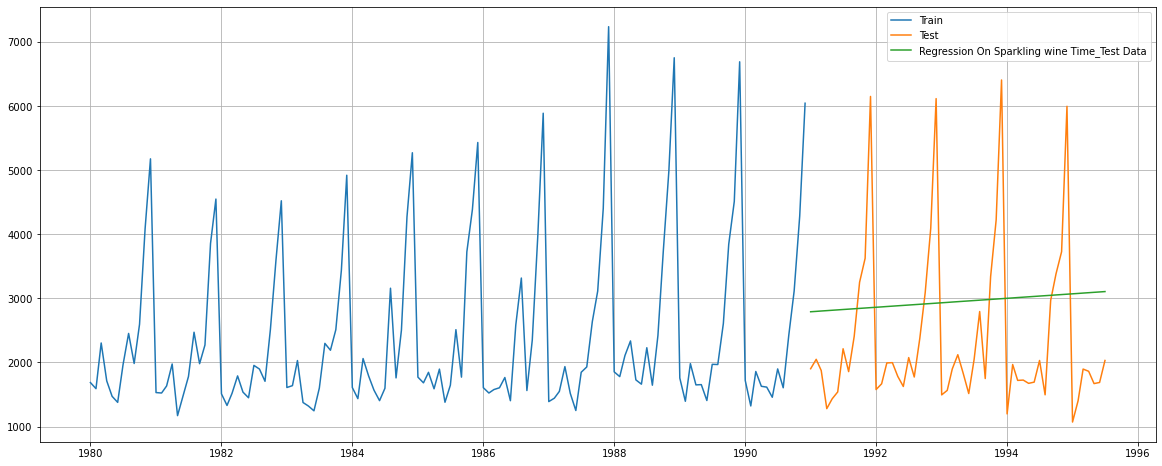

In [1189]:
#Plotting the result
plt.figure(figsize=(20,8))
plt.plot( S_LR_train['Sparkling'], label='Train')
plt.plot(S_LR_test['Sparkling'], label='Test')
plt.plot(S_LR_test['RegOnTime'], label='Regression On Sparkling wine Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [1190]:
#Model Evaluation
## Test Data - RMSE

S_LR_rmse_model_test = metrics.mean_squared_error(S_LR_test['Sparkling'],S_test_predictions_model,squared=False)
print("For RegressionOnTime forecast on the Sparkling Test Data,  RMSE is %3.3f" %(S_LR_rmse_model_test))

For RegressionOnTime forecast on the Sparkling Test Data,  RMSE is 1389.135


In [1191]:
results_Df_8 = pd.DataFrame({'Sparkling Test RMSE': [S_LR_rmse_model_test]},index=['RegressionOnTime'])


S_resultsDf = pd.concat([S_resultsDf, results_Df_8])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
RegressionOnTime                                            1389.135175

### naïve forecast models

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

**Rose wine sale data:**

In [1192]:
R_NM_train = rose_train.copy()
R_NM_test = rose_test.copy()

In [1193]:
R_NM_test['naive'] = np.asarray(R_NM_train['Rose'])[len(np.asarray(R_NM_train['Rose']))-1]
R_NM_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Freq: MS, Name: naive, dtype: float64

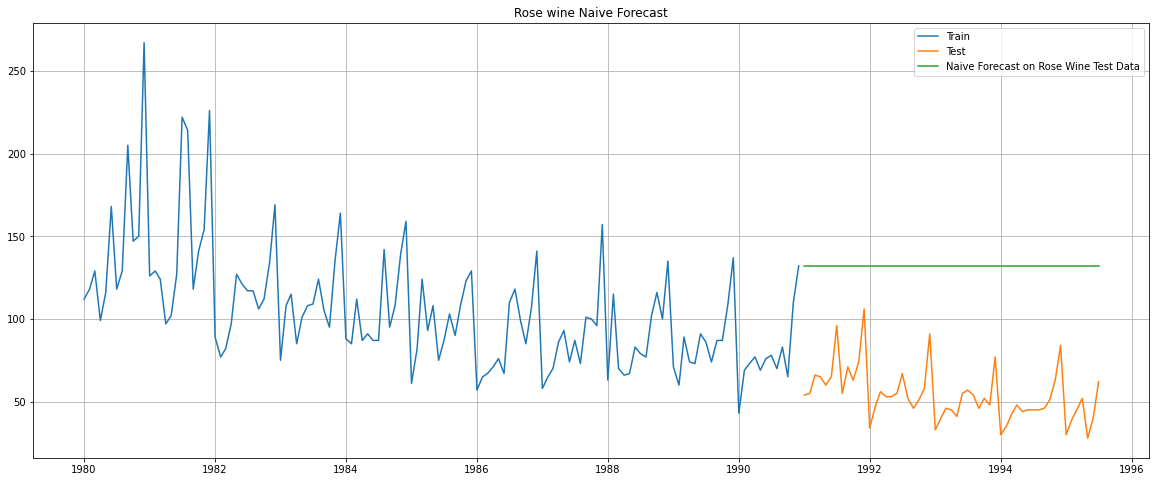

In [1194]:
#Plotting result with original test data
plt.figure(figsize=(20,8))
plt.plot(R_NM_train['Rose'], label='Train')
plt.plot(R_NM_test['Rose'], label='Test')
plt.plot(R_NM_test['naive'], label='Naive Forecast on Rose Wine Test Data')
plt.legend(loc='best')
plt.title("Rose wine Naive Forecast")
plt.grid();

In [1195]:
#Model Evaluation
# Test Data - RMSE

R_nm_rmse_model_test = metrics.mean_squared_error(R_NM_test['Rose'],R_NM_test['naive'],squared=False)
print("For naïve forecast on the Test Data,  RMSE is %3.3f" %(R_nm_rmse_model_test))

For naïve forecast on the Test Data,  RMSE is 79.739


In [1196]:
resultsDf_9 = pd.DataFrame({'Rose Test RMSE': [R_nm_rmse_model_test]},index=['NaiveModel'])

R_resultsDf = pd.concat([R_resultsDf, resultsDf_9])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
RegressionOnTime                                         15.275732
NaiveModel                                               79.738550

**Sparkling wine sale data:**

In [1197]:
S_NM_train = sparkling_train.copy()
S_NM_test = sparkling_test.copy()


In [1198]:
S_NM_test['naive'] = np.asarray(S_NM_train['Sparkling'])[len(np.asarray(S_NM_train['Sparkling']))-1]
S_NM_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Freq: MS, Name: naive, dtype: int64

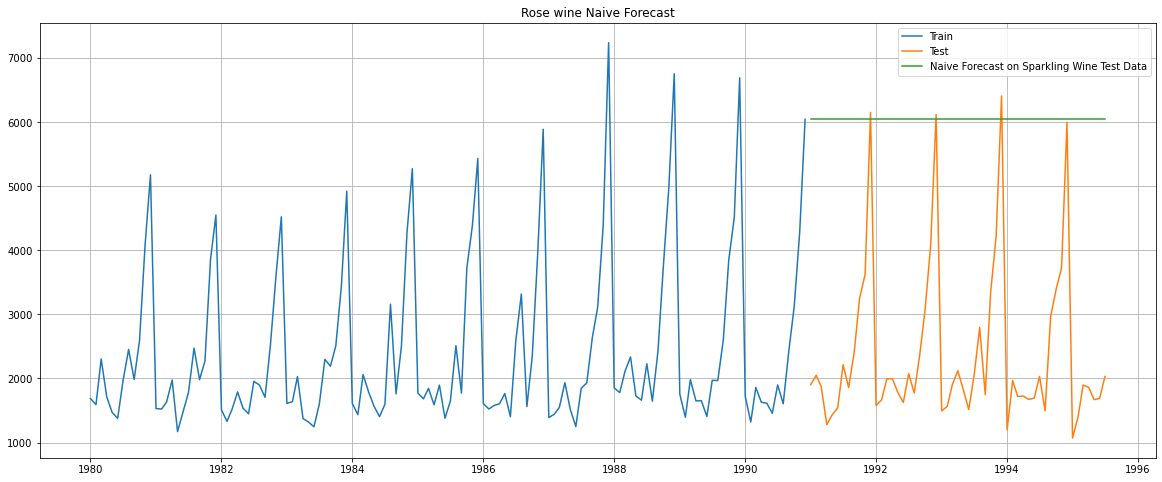

In [1199]:
#Plotting result with original test data
plt.figure(figsize=(20,8))
plt.plot(S_NM_train['Sparkling'], label='Train')
plt.plot(S_NM_test['Sparkling'], label='Test')
plt.plot(S_NM_test['naive'], label='Naive Forecast on Sparkling Wine Test Data')
plt.legend(loc='best')
plt.title("Rose wine Naive Forecast")
plt.grid();

In [1200]:
#Model Evaluation
# Test Data - RMSE

S_nm_rmse_model_test = metrics.mean_squared_error(S_NM_test['Sparkling'],S_NM_test['naive'],squared=False)
print("For naïve forecast on the Sparkling wine Test Data,  RMSE is %3.3f" %(S_nm_rmse_model_test))

For naïve forecast on the Sparkling wine Test Data,  RMSE is 3864.279


In [1201]:
resultsDf_10 = pd.DataFrame({'Sparkling Test RMSE': [S_nm_rmse_model_test]},index=['NaiveModel'])

S_resultsDf = pd.concat([S_resultsDf, resultsDf_10])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352

### Simple Average Model

**For this particular simple average method, we will forecast by using the average of the training values.**

**Rose wine sale data:**

In [1202]:
#copying test and train data frame to temporary df
R_SA_train = rose_train.copy()
R_SA_test = rose_test.copy()

In [1203]:
#Finding average of train dat and storing in test df
R_SA_test['mean_forecast'] = R_SA_train['Rose'].mean()
R_SA_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

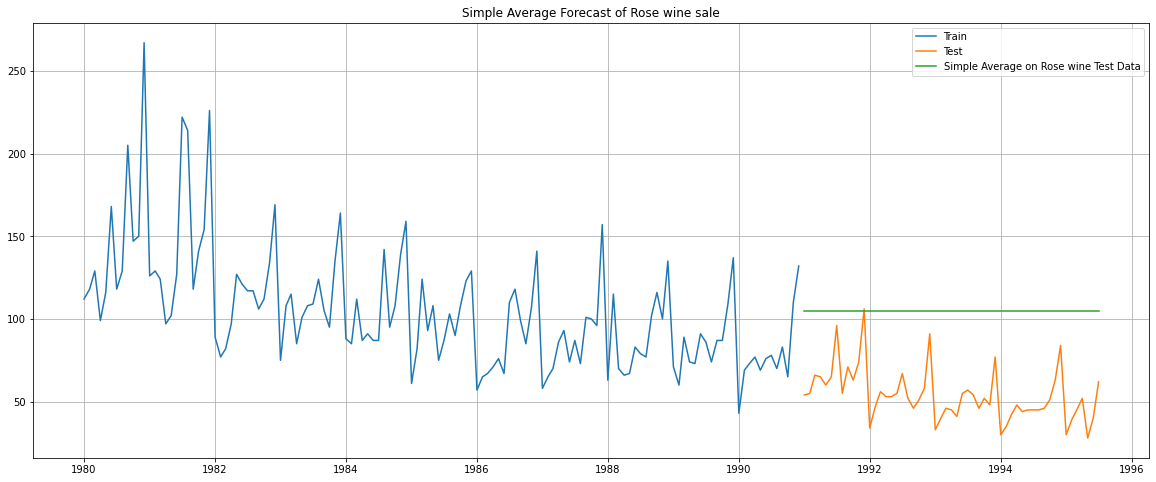

In [1204]:
#Plotting the forecast
plt.figure(figsize=(20,8))
plt.plot(R_SA_train['Rose'], label='Train')
plt.plot(R_SA_test['Rose'], label='Test')
plt.plot(R_SA_test['mean_forecast'], label='Simple Average on Rose wine Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast of Rose wine sale")
plt.grid();

In [1205]:
#Model Evaluation
## Test Data - RMSE 

R_sa_rmse_model_test = metrics.mean_squared_error(R_SA_test['Rose'],R_SA_test['mean_forecast'],squared=False)
print("For simple average forecast on the Rose wine Test Data,  RMSE is %3.3f" %(R_sa_rmse_model_test))

For simple average forecast on the Rose wine Test Data,  RMSE is 53.481


In [1206]:
resultsDf_11 = pd.DataFrame({'Rose Test RMSE': [R_sa_rmse_model_test]},index=['Simple average forecast'])

R_resultsDf = pd.concat([R_resultsDf, resultsDf_11])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
RegressionOnTime                                         15.275732
NaiveModel                                               79.738550
Simple average forecast                                  53.480857

**Sparkling ine sale data:**

In [1207]:
#copying test and train data frame to temporary df
S_SA_train = sparkling_train.copy()
S_SA_test = sparkling_test.copy()

In [1208]:
#Finding average of train dat and storing in test df
S_SA_test['mean_forecast'] = S_SA_train['Sparkling'].mean()
S_SA_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

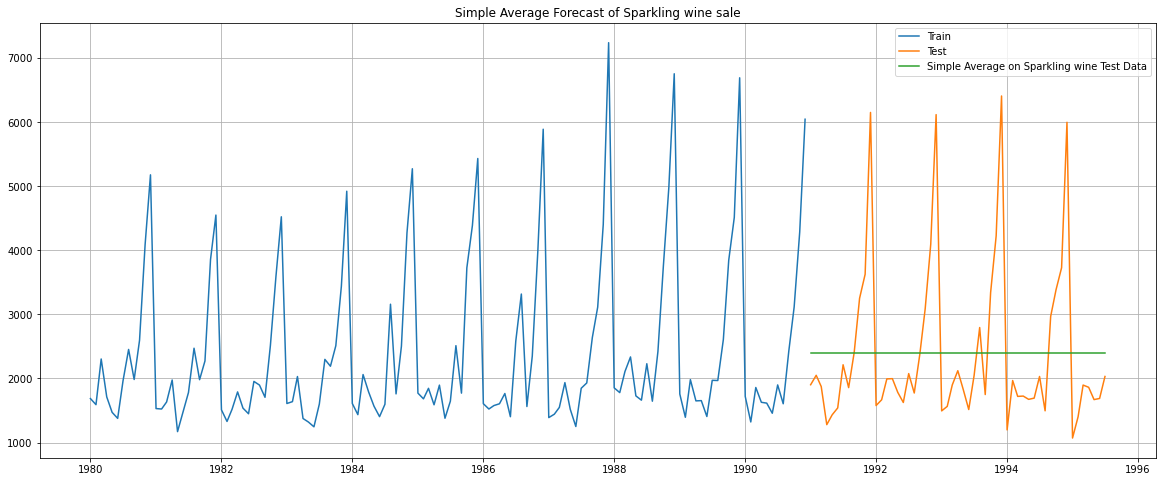

In [1209]:
#Plotting the forecast
plt.figure(figsize=(20,8))
plt.plot(S_SA_train['Sparkling'], label='Train')
plt.plot(S_SA_test['Sparkling'], label='Test')
plt.plot(S_SA_test['mean_forecast'], label='Simple Average on Sparkling wine Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast of Sparkling wine sale")
plt.grid();

In [1210]:
#Model Evaluation
## Test Data - RMSE 

S_sa_rmse_model_test = metrics.mean_squared_error(S_SA_test['Sparkling'],S_SA_test['mean_forecast'],squared=False)
print("For simple average forecast on the Sparkling wine Test Data,  RMSE is %3.3f" %(S_sa_rmse_model_test))

For simple average forecast on the Sparkling wine Test Data,  RMSE is 1275.082


In [1211]:
resultsDf_12 = pd.DataFrame({'Sparkling Test RMSE': [S_sa_rmse_model_test]},index=['Simple average forecast'])

S_resultsDf = pd.concat([S_resultsDf, resultsDf_12])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
Simple average forecast                                     1275.081804

### Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

**Rose wine sale data:**

In [1212]:
R_MovingAverage = rose.copy()
R_MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [1213]:
#Finding out  moving average for different point trailings
R_MovingAverage['Trailing_2'] = R_MovingAverage['Rose'].rolling(2).mean()
R_MovingAverage['Trailing_4'] = R_MovingAverage['Rose'].rolling(4).mean()
R_MovingAverage['Trailing_6'] = R_MovingAverage['Rose'].rolling(6).mean()
R_MovingAverage['Trailing_9'] = R_MovingAverage['Rose'].rolling(9).mean()

R_MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

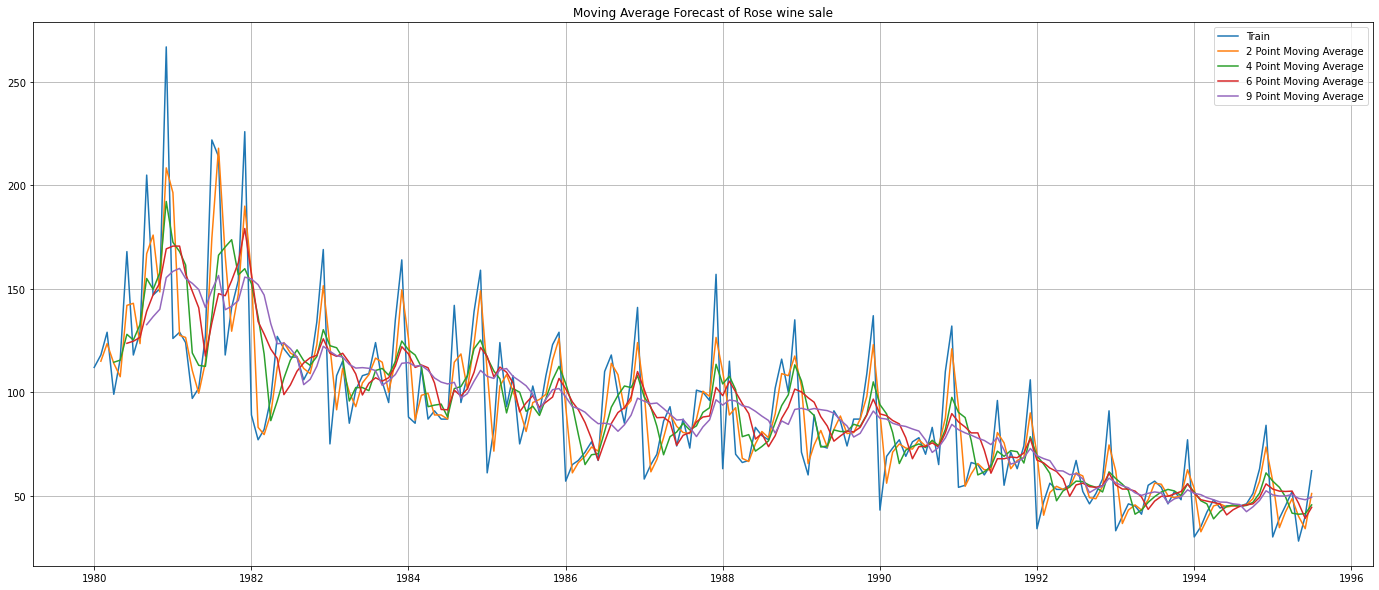

In [1214]:
## Plotting on the whole data

plt.figure(figsize=(24,10))
plt.plot(R_MovingAverage['Rose'], label='Train')
plt.plot(R_MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(R_MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(R_MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(R_MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast of Rose wine sale")
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [1215]:
#Creating train and test set 
R_trailing_MovingAverage_train=R_MovingAverage[R_MovingAverage.index.year<1991] 
R_trailing_MovingAverage_test=R_MovingAverage[R_MovingAverage.index.year>=1991]

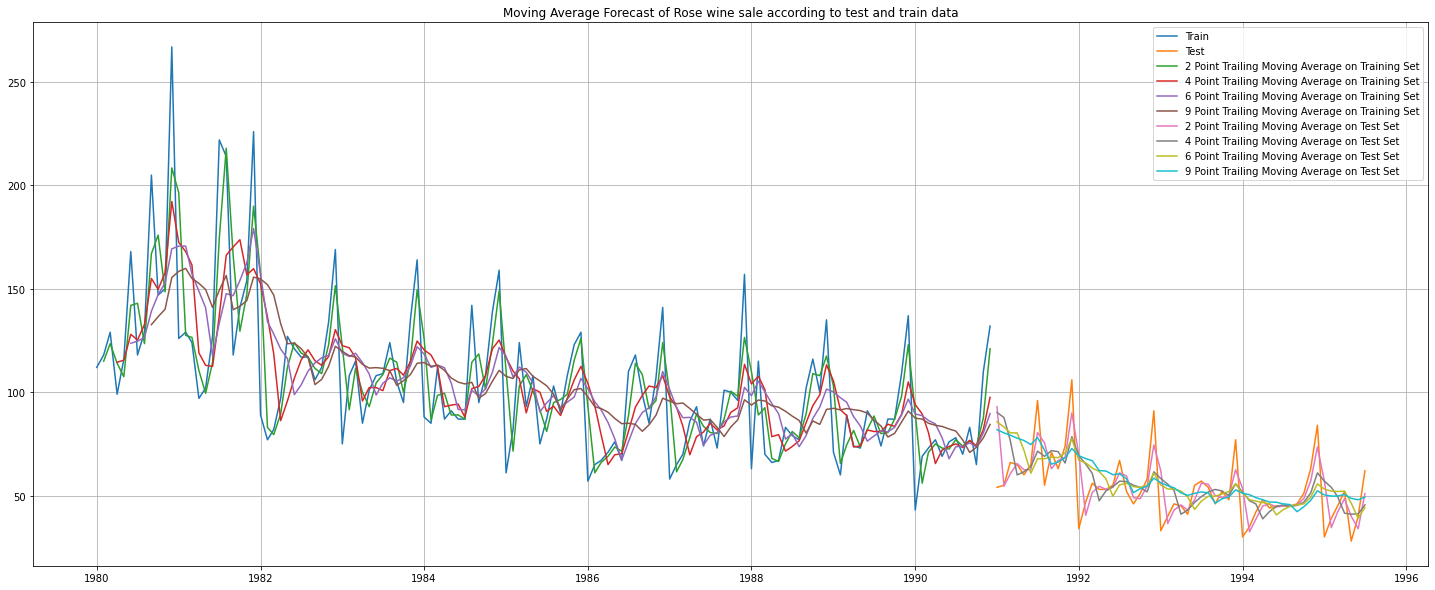

In [1216]:

## Plotting on both the Training and Test data

plt.figure(figsize=(25,10))
plt.plot(R_trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(R_trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(R_trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(R_trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(R_trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(R_trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(R_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(R_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(R_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(R_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast of Rose wine sale according to test and train data")
plt.grid();

In [1217]:
#Model evaluation
## Test Data - RMSE --> 2 point Trailing MA

R_ma_rmse_model_test_2 = metrics.mean_squared_error(rose_test['Rose'],R_trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(R_ma_rmse_model_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

R_ma_rmse_model_test_4 = metrics.mean_squared_error(rose_test['Rose'],R_trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(R_ma_rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

R_ma_rmse_model_test_6 = metrics.mean_squared_error(rose_test['Rose'],R_trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(R_ma_rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

R_ma_rmse_model_test_9 = metrics.mean_squared_error(rose_test['Rose'],R_trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(R_ma_rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.455
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.572
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.731 


In [1219]:

resultsDf_13 = pd.DataFrame({'Rose Test RMSE': [R_ma_rmse_model_test_2,R_ma_rmse_model_test_4
                                          ,R_ma_rmse_model_test_6,R_ma_rmse_model_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

R_resultsDf = pd.concat([R_resultsDf, resultsDf_13])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
RegressionOnTime                                         15.275732
NaiveModel                                               79.738550
Simple average forecast                                  53.480857
2pointTrailingMovingAverage                              11.529409
4pointTrailingMovingAverage                              14.455221
6pointTrailingMovingAverage                              14.572009
9pointTrailingMovingAverage                              14.731209

**Sparkling wine sale data:**

In [1220]:
S_MovingAverage = sparkling.copy()
S_MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1221]:
#Finding out  moving average for different point trailings
S_MovingAverage['Trailing_2'] = S_MovingAverage['Sparkling'].rolling(2).mean()
S_MovingAverage['Trailing_4'] = S_MovingAverage['Sparkling'].rolling(4).mean()
S_MovingAverage['Trailing_6'] = S_MovingAverage['Sparkling'].rolling(6).mean()
S_MovingAverage['Trailing_9'] = S_MovingAverage['Sparkling'].rolling(9).mean()

S_MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

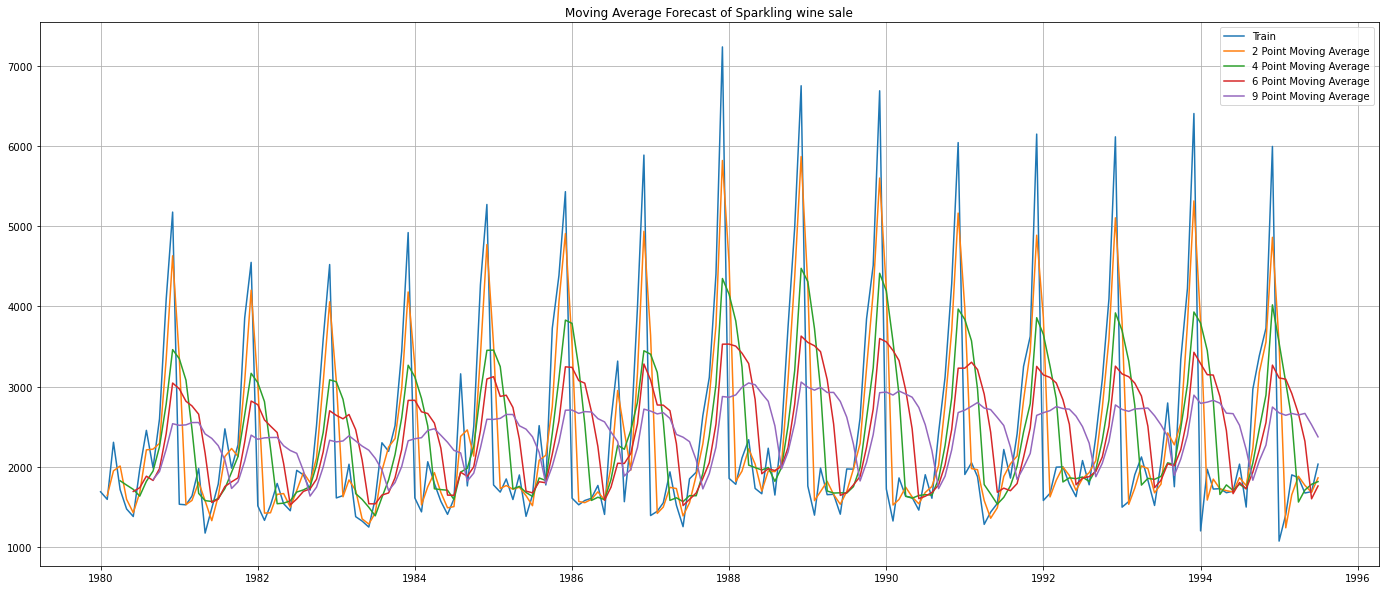

In [1222]:
# Plotting on the whole data

plt.figure(figsize=(24,10))
plt.plot(S_MovingAverage['Sparkling'], label='Train')
plt.plot(S_MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(S_MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(S_MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(S_MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast of Sparkling wine sale")
plt.grid();

In [1223]:
#Creating train and test set 
S_trailing_MovingAverage_train=S_MovingAverage[S_MovingAverage.index.year<1991] 
S_trailing_MovingAverage_test=S_MovingAverage[S_MovingAverage.index.year>=1991]

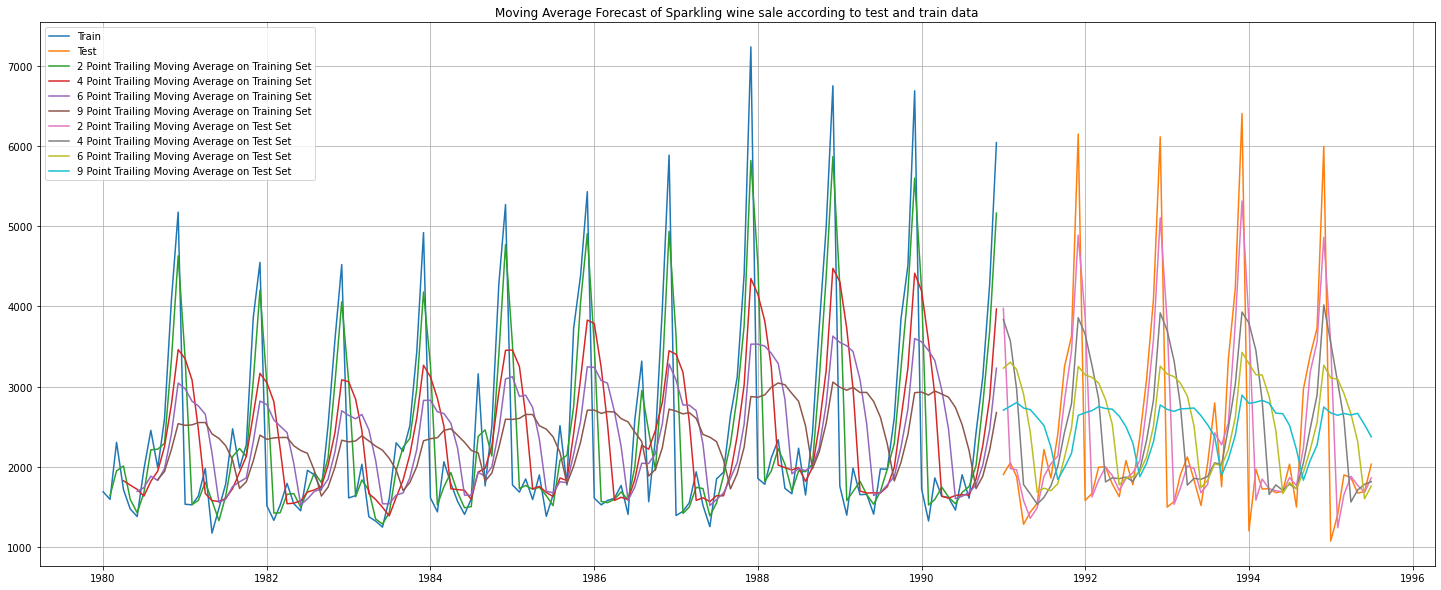

In [1227]:
plt.figure(figsize=(25,10))
plt.plot(S_trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(S_trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(S_trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(S_trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(S_trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(S_trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(S_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(S_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(S_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(S_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast of Sparkling wine sale according to test and train data")
plt.grid();

In [1224]:
#Model evaluation
## Test Data - RMSE --> 2 point Trailing MA

S_ma_rmse_model_test_2 = metrics.mean_squared_error(sparkling_test['Sparkling'],S_trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(S_ma_rmse_model_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

S_ma_rmse_model_test_4 = metrics.mean_squared_error(sparkling_test['Sparkling'],S_trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(S_ma_rmse_model_test_4))

## Test Data - RMSE --> 6 point Trailing MA

S_ma_rmse_model_test_6 = metrics.mean_squared_error(sparkling_test['Sparkling'],S_trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(S_ma_rmse_model_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

S_ma_rmse_model_test_9 = metrics.mean_squared_error(sparkling_test['Sparkling'],S_trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(S_ma_rmse_model_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [1225]:
resultsDf_14 = pd.DataFrame({'Sparkling Test RMSE': [S_ma_rmse_model_test_2,S_ma_rmse_model_test_4
                                          ,S_ma_rmse_model_test_6,S_ma_rmse_model_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

S_resultsDf = pd.concat([S_resultsDf, resultsDf_14])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
Simple average forecast                                     1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315

### Let us plot all the models and compare the Time Series plots with test RMSE.

#### Rose wine sale data:

In [1226]:
print('Sorted by RMSE values on the Rose wine Test Data:','\n',)
R_resultsDf.sort_values(by=['Rose Test RMSE'])

Sorted by RMSE values on the Rose wine Test Data: 



Rose Test RMSE
2pointTrailingMovingAverage                              11.529409
4pointTrailingMovingAverage                              14.455221
6pointTrailingMovingAverage                              14.572009
9pointTrailingMovingAverage                              14.731209
RegressionOnTime                                         15.275732
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Simple average forecast                                  53.480857
NaiveModel                                               79.738550

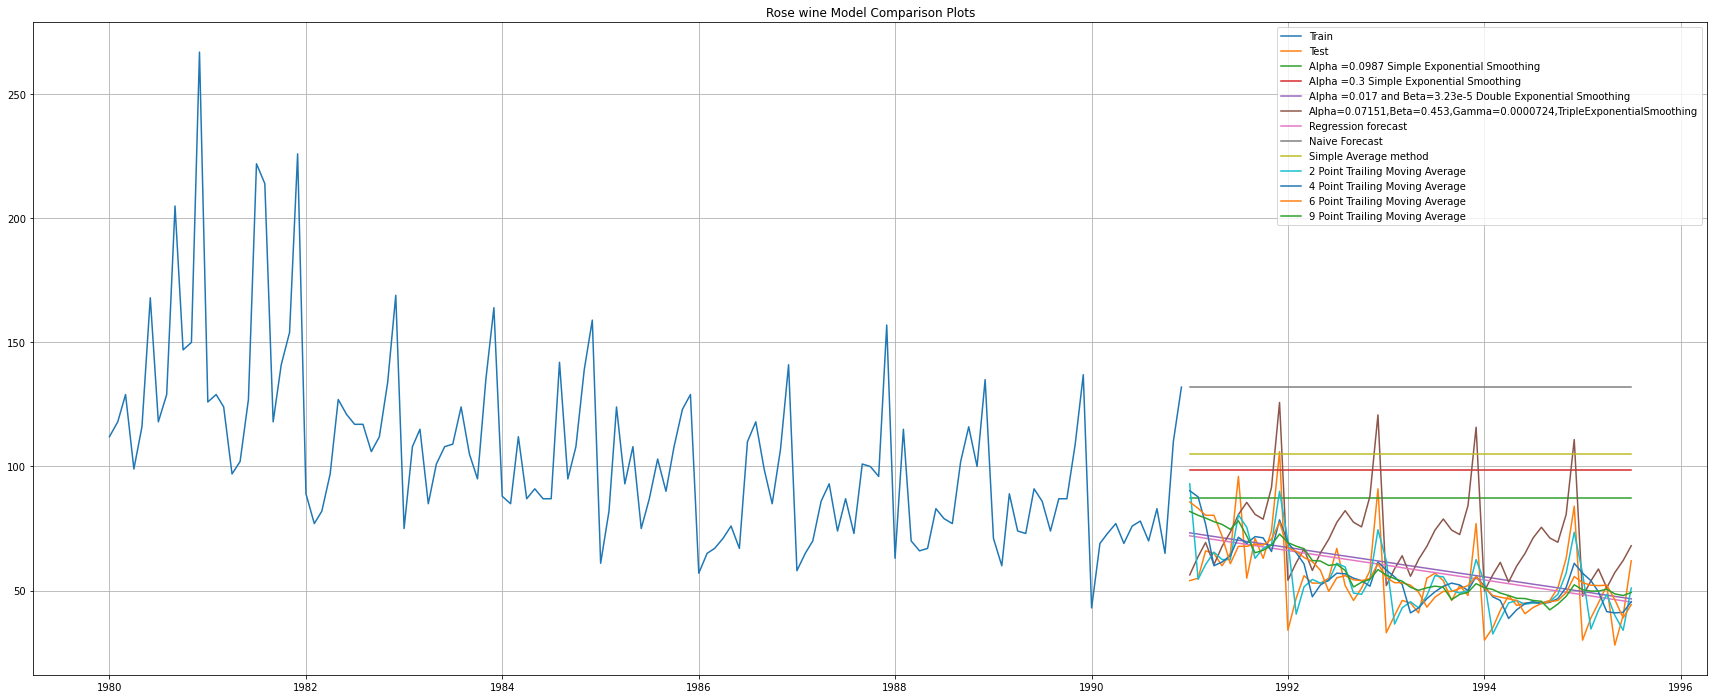

In [1231]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(rose_train['Rose'], label='Train')
plt.plot(rose_test['Rose'], label='Test')

plt.plot(R_SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing ')
plt.plot(R_SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing ')
plt.plot(R_DES_test['predict'], label='Alpha =0.017 and Beta=3.23e-5 Double Exponential Smoothing ')
plt.plot(R_TES_test['predict'], label='Alpha=0.07151,Beta=0.453,Gamma=0.0000724,TripleExponentialSmoothing')
plt.plot(R_LR_test['RegOnTime'], label='Regression forecast')
plt.plot(R_NM_test['naive'], label='Naive Forecast ')
plt.plot(R_SA_test['mean_forecast'], label='Simple Average method')
plt.plot(R_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average')
plt.plot(R_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average ')
plt.plot(R_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average')
plt.plot(R_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average ')


plt.legend(loc='best')
plt.title("Rose wine Model Comparison Plots")
plt.grid();

**Observation:**
* Tripple Exponential smoothing work better comapare to simple and double exponential smoothing as it is including level, trend and seasonality.
* Naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today. As it is not including trend and seasonality, the RMSE is highest among all the methods followed by simple average forecast.
* Rollong moving average work better among all the other models and regression model RMSE is almost matches with rolling moving average in RMSE.
* From the above data, we can consider 2 point trailig moving average model is the best model with lower RMSE 11.53.



#### Rose wine sale data:


In [1230]:
print('Sorted by RMSE values on the Sparkling wine Test Data:','\n',)
S_resultsDf.sort_values(by=['Sparkling Test RMSE'])

Sorted by RMSE values on the Sparkling wine Test Data: 



Sparkling Test RMSE
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
Simple average forecast                                     1275.081804
6pointTrailingMovingAverage                                 1283.927428
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
9pointTrailingMovingAverage                                 1346.278315
RegressionOnTime                                            1389.135175
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
NaiveModel                                                  3864.279352

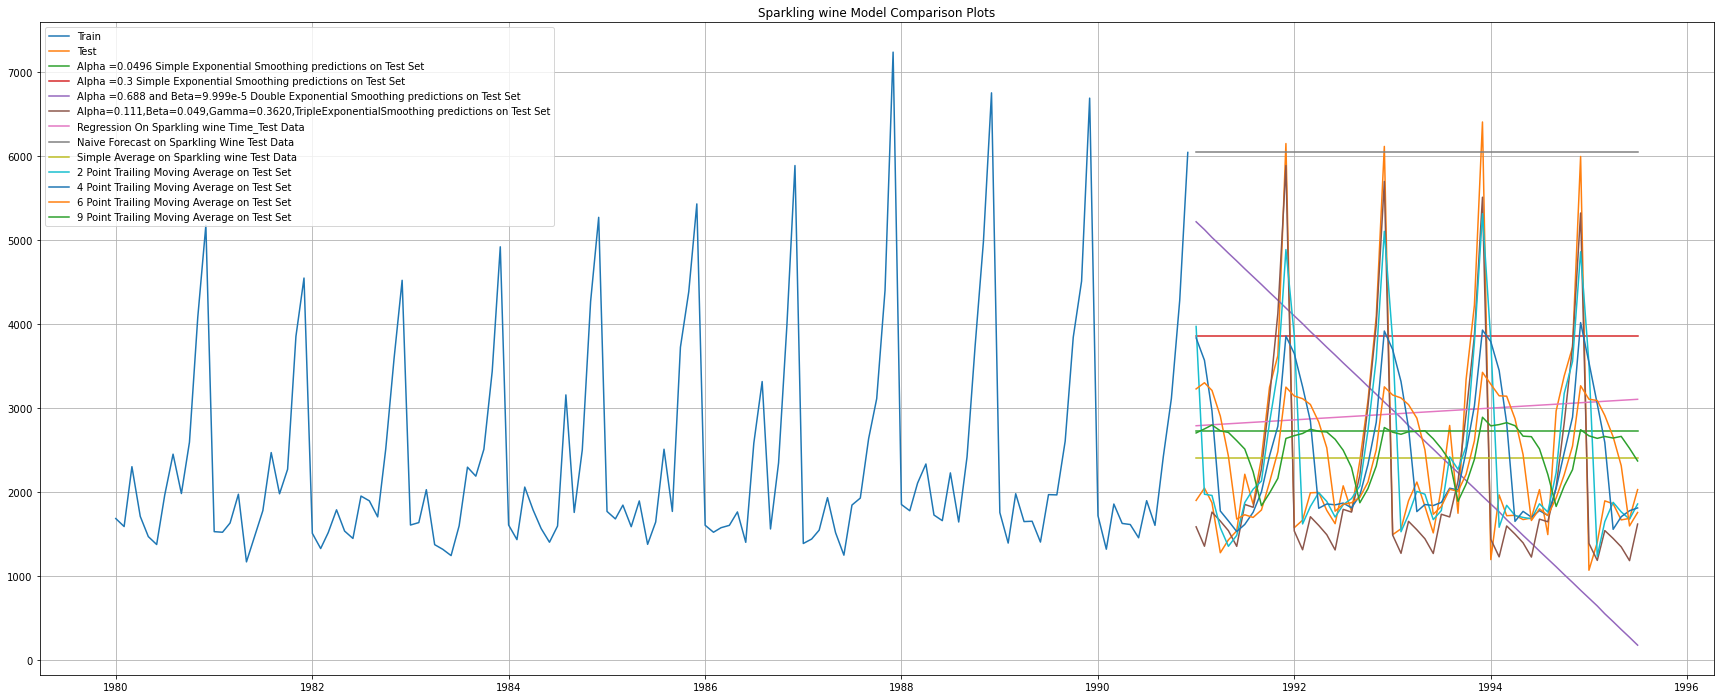

In [1233]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(sparkling_train['Sparkling'], label='Train')
plt.plot(sparkling_test['Sparkling'], label='Test')

plt.plot(S_SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')
plt.plot(S_SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(S_DES_test['predict'], label='Alpha =0.688 and Beta=9.999e-5 Double Exponential Smoothing predictions on Test Set')
plt.plot(S_TES_test['predict'], label='Alpha=0.111,Beta=0.049,Gamma=0.3620,TripleExponentialSmoothing predictions on Test Set')
plt.plot(S_LR_test['RegOnTime'], label='Regression On Sparkling wine Time_Test Data')
plt.plot(S_NM_test['naive'], label='Naive Forecast on Sparkling Wine Test Data')
plt.plot(S_SA_test['mean_forecast'], label='Simple Average on Sparkling wine Test Data')
plt.plot(S_trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(S_trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(S_trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(S_trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc='best')
plt.title("Sparkling wine Model Comparison Plots")
plt.grid();

**Observation:**
* Tripple Exponential smoothing work better comapare to simple and double exponential smoothing as it is including level, trend and seasonality.
* Naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today. As it is not including trend and seasonality, the RMSE is highest among all the methods followed by Alpha=0.688,Beta=0.0000999,DoubleExponentialSmoothingt which can be considered as poor models.
* From the above data, we can consider Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Exponential Smoothing is the best model with lower RMSE 404.29.


### Q5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [1234]:
from statsmodels.tsa.stattools import adfuller

To check whether the series is stationary, we use the Augmented Dickey Fuller (ADF)test whose null andalternate hypothesis can be simplified to

**`Null Hypothesis H0`:** Time series is not stationery

**`Alternative Hypothesis H1`:** Time series is stationery


**Rose data:**

In [1239]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

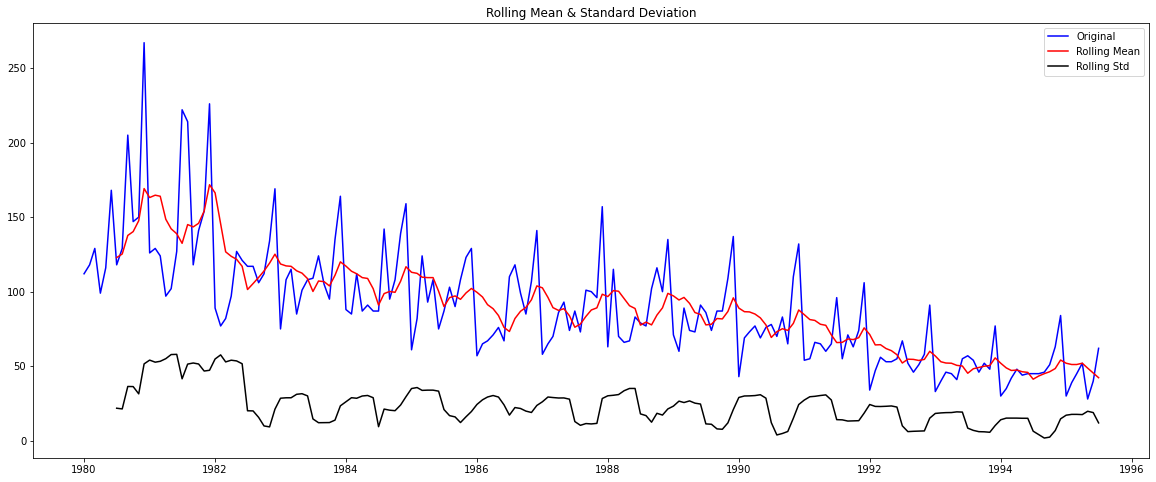

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [1240]:
test_stationarity(rose['Rose'])

**since p-value> 0.05, at alpha 0.05, time series is not stationary.
We can take next levels of differencing(a difference of order 1 ) to make a Time Series stationary.**

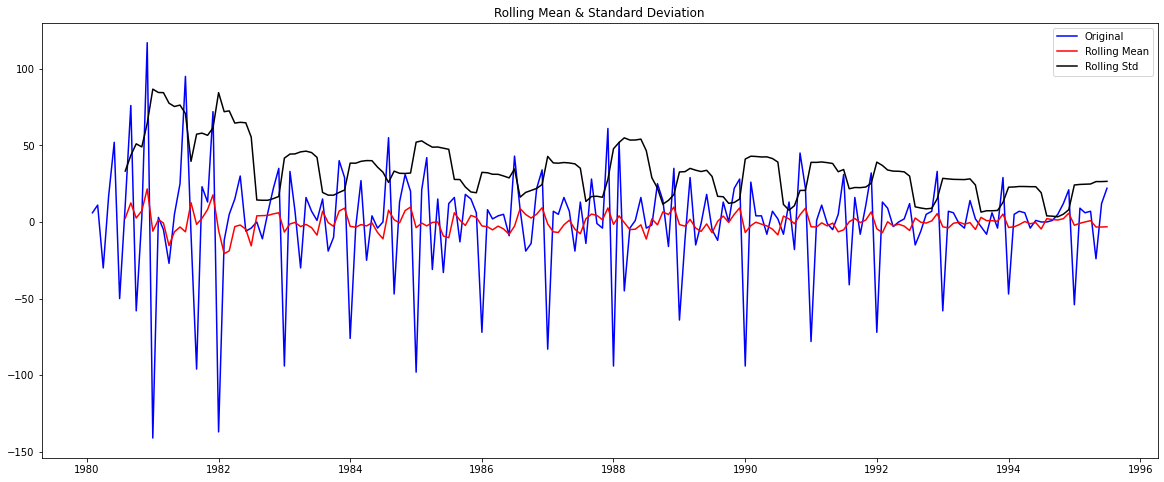

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [1241]:
test_stationarity(rose['Rose'].diff().dropna())

**Observation:**
After next level of levels of differencing p-value <0.05. We see that at  𝛼  = 0.05 the Time Series is indeed stationary therefore series is stationary.


**Sparkling wine sale data:**

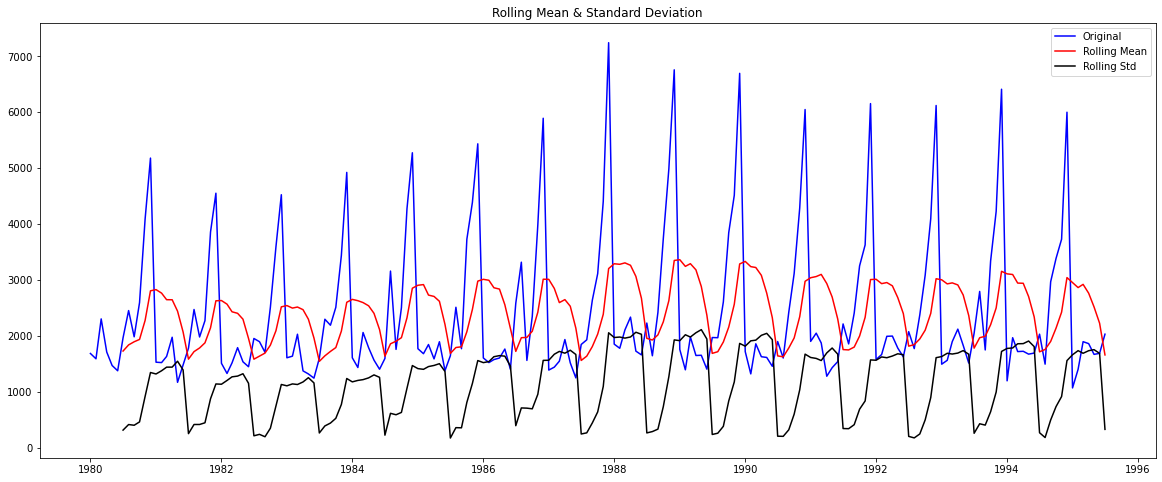

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1244]:
test_stationarity(sparkling['Sparkling'])

since p-value> 0.05, at alpha 0.05, time series is not stationary. We can take next levels of differencing to make a Time Series stationary.

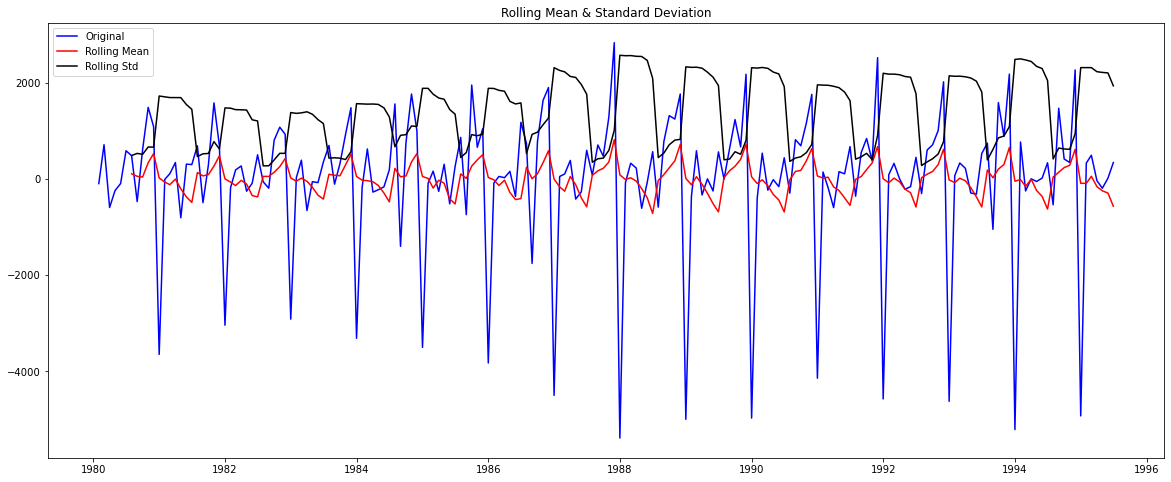

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [1245]:
test_stationarity(sparkling['Sparkling'].diff().dropna())

**Observation:** After next level of levels of differencing p-value <0.05 therefore series is stationary.

## Q6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

**Rose data:**

Since the data is not stationery and seasonal in nature therefore we choose Sarimax model

In [1294]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1295]:
stepwise_fit = auto_arima(rose_train['Rose'], start_p=0, start_q=0,
                          max_p=4, max_q=4, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True, 
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1264.102, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1335.153, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1275.846, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1333.155, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1307.486, Time=0.22 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1286.913, Time=0.23 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1294.424, Time=0.50 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1272.395, Time=0.42 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1251.047, Time=1.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1293.983, Time=0.37 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -594.281
Date:                              Sun, 04 Sep 2022   AIC                           1200.562
Time:                                      15:21:17   BIC                           1217.813
Sample:                                  01-01-1980   HQIC                          1207.572
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5364      0.166     -3.241      0.001      -0.861      -0.212
ma.L1         -0.1584      0.146     -1.085      0.278      -0.444       0.128
ma.L2         -0.7064      0.133     -5.327      0.000      -0.966      -0.447
ar.S.L12       0.9865      0.020     49.830      0.000       0.948       1.025
ma.S.L12      -0.7978      0.144     -5.558      0.000      -1.079      -0.516
sigma2       438.1831     56.485      7.758      0.000     327.475     548.891
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                58.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1297]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -594.281
Date:                              Sun, 04 Sep 2022   AIC                           1200.562
Time:                                      15:21:31   BIC                           1217.813
Sample:                                  01-01-1980   HQIC                          1207.572
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5364      0.166     -3.241      0.001      -0.861      -0.212
ma.L1         -0.1584      0.146     -1.085      0.278      -0.444       0.128
ma.L2         -0.7064      0.133     -5.327      0.000      -0.966      -0.447
ar.S.L12       0.9865      0.020     49.830      0.000       0.948       1.025
ma.S.L12      -0.7978      0.144     -5.558      0.000      -1.079      -0.516
sigma2       438.1831     56.485      7.758      0.000     327.475     548.891
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                58.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Sparklig wine data**

In [1316]:
S_stepwise_fit = auto_arima(sparkling_train['Sparkling'], start_p=0, start_q=0,
                          max_p=4, max_q=4, m=12,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True, 
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1782.291, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1802.591, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1785.414, Time=0.62 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1778.358, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1800.605, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1797.959, Time=0.23 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1779.826, Time=1.53 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1779.771, Time=1.30 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1785.188, Time=0.81 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1782.019, Time=3.00 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1780.549, Time=0.60 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1779.603, Time=1.35 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1780.339, Time=0.60 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1778.494, Time=0.70 sec
 ARIMA(1,0,2)(0,1,1

In [1317]:
S_stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -885.179
Date:                            Sun, 04 Sep 2022   AIC                           1778.358
Time:                                    16:37:23   BIC                           1789.508
Sample:                                01-01-1980   HQIC                          1782.886
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     37.3695     26.640      1.403      0.161     -14.843      89.582
ma.L1          0.1882      0.090      2.090      0.037       0.012       0.365
ma.S.L12      -0.4763      0.071     -6.675      0.000      -0.616      -0.336
sigma2      1.478e+05   1.38e+04     10.681      0.000    1.21e+05    1.75e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                48.14
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.15   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Q7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

**Rose data:**

From the above auto_arima method we got best Sarima model  (1,1,2)(1,0,1)[12] for Rose data

In [1338]:
R_sarimax_model = SARIMAX(rose_train["Rose"],order=(1,1,2),seasonal_order=(1,0,1,12))
R_Sarima_results = R_sarimax_model.fit()
R_Sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -594.281
Date:                              Sun, 04 Sep 2022   AIC                           1200.562
Time:                                      17:19:40   BIC                           1217.813
Sample:                                  01-01-1980   HQIC                          1207.572
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5364      0.166     -3.241      0.001      -0.861      -0.212
ma.L1         -0.1584      0.146     -1.085      0.278      -0.444       0.128
ma.L2         -0.7064      0.133     -5.327      0.000      -0.966      -0.447
ar.S.L12       0.9865      0.020     49.830      0.000       0.948       1.025
ma.S.L12      -0.7978      0.144     -5.558      0.000      -1.079      -0.516
sigma2       438.1831     56.485      7.758      0.000     327.475     548.891
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                58.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1339]:
start=len(rose_train)
end=len(rose_train)+len(rose_test)-1
R_sarimax_predictions = R_Sarima_results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Rose SARIMA Predictions')

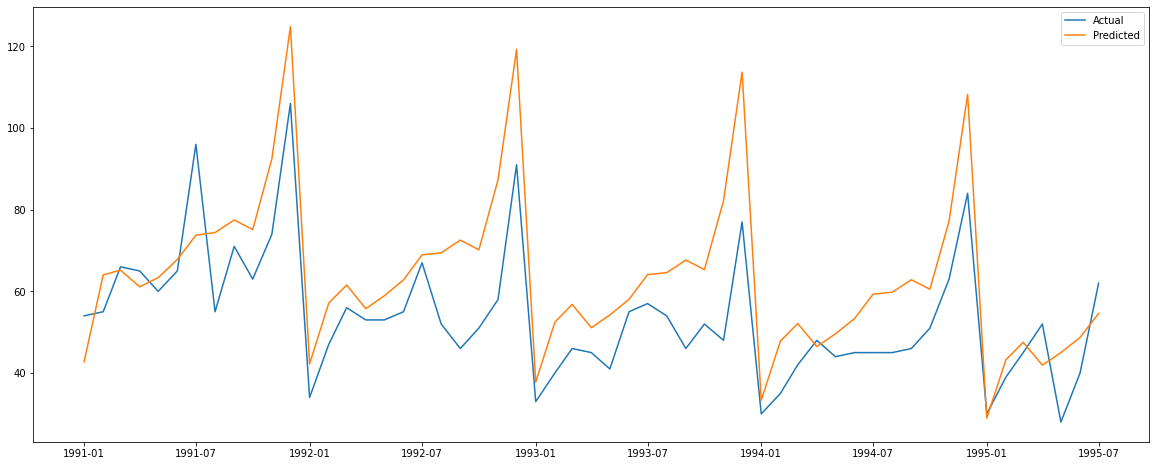

In [1340]:
plt.figure(figsize=(20,8))
plt.plot(rose_test["Rose"],label="Actual")
plt.plot(R_sarimax_predictions,label="Predicted")
plt.legend()
plt.show()

In [1351]:
#RMSE of SARIMAX Rose wine data

R_sarima_pred=np.sqrt(mean_squared_error(rose_test["Rose"],R_sarimax_predictions))
R_sarima_pred

14.578281918727992

In [1350]:
resultsDf_15 = pd.DataFrame({'Rose Test RMSE': [R_sarima_pred]},index=['SARIMAX'])
resultsDf_15

Rose Test RMSE
SARIMAX       14.578282

In [1352]:
R_resultsDf = pd.concat([R_resultsDf, resultsDf_15])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
RegressionOnTime                                         15.275732
NaiveModel                                               79.738550
Simple average forecast                                  53.480857
2pointTrailingMovingAverage                              11.529409
4pointTrailingMovingAverage                              14.455221
6pointTrailingMovingAverage                              14.572009
9pointTrailingMovingAverage                              14.731209
SARIMAX                                                  14.578282

**Observation:** The SARIMAX RMSE is one of the lowest value among different forecasting models.

**Sparkling wine sale data:**

From the above auto_arima method we got best Sarima model  (0,0,1)(0,1,1)[12] for Sparkling data

In [1353]:
S_sarimax_model = SARIMAX(sparkling_train["Sparkling"],order=(0,0,1),seasonal_order=(0,1,1,12))
S_Sarima_results = S_sarimax_model.fit()
S_Sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -886.229
Date:                            Sun, 04 Sep 2022   AIC                           1778.458
Time:                                    17:57:05   BIC                           1786.820
Sample:                                01-01-1980   HQIC                          1781.854
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2040      0.087      2.354      0.019       0.034       0.374
ma.S.L12      -0.4254      0.069     -6.180      0.000      -0.560      -0.290
sigma2      1.504e+05   1.29e+04     11.618      0.000    1.25e+05    1.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                43.91
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                             0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1354]:
start=len(sparkling_train)
end=len(sparkling_train)+len(sparkling_test)-1
S_sarimax_predictions = S_Sarima_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Sparkling SARIMA Predictions')

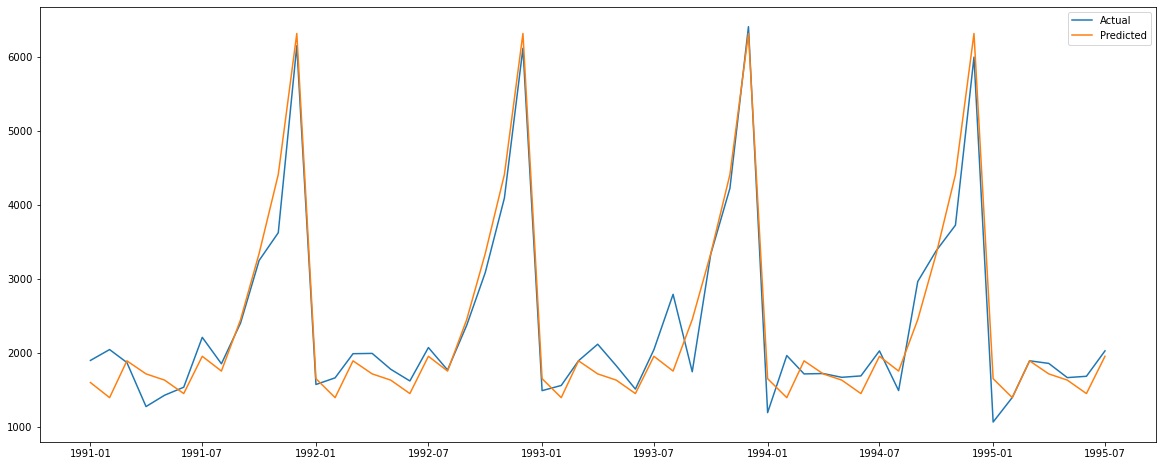

In [1355]:
plt.figure(figsize=(20,8))
plt.plot(sparkling_test["Sparkling"],label="Actual")
plt.plot(S_sarimax_predictions,label="Predicted")
plt.legend()
plt.show()

In [ ]:
#Plotting the diagnostic plot
S_sarimax_predictions.to_frame()
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [1356]:
#RMSE of SARIMAX Sparkling wine data

S_sarima_pred=np.sqrt(mean_squared_error(sparkling_test["Sparkling"],S_sarimax_predictions))
S_sarima_pred

323.7008774953012

In [1357]:
resultsDf_16 = pd.DataFrame({'Sparkling Test RMSE': [S_sarima_pred]},index=['SARIMAX'])
resultsDf_16

Sparkling Test RMSE
SARIMAX           323.700877

In [1358]:
S_resultsDf = pd.concat([S_resultsDf, resultsDf_16])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
Simple average forecast                                     1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
SARIMAX                                                      323.700877

**Observation:** The SARIMAX RMSE is the best value among different forecasting models. So It can be the best forecasting model.

### ARIMA MODEL:

#### Rose wine sale data


In [1371]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [1372]:
# Creating an empty Dataframe with column names only
R_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
R_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1382]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    R_ARIMA_model = ARIMA(rose_train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,R_ARIMA_model.aic))
    R_ARIMA_AIC = R_ARIMA_AIC.append({'param':param, 'AIC': R_ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223310003
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284
ARIMA(2, 1, 3) - AIC:1274.6949119626274
ARIMA(3, 1, 0) - AIC:1297.48109172717
ARIMA(3, 1, 1) - AIC:1282.4192776271977
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6588655941036


In [1383]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

R_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
27  (2, 1, 3)  1274.694912
11  (2, 1, 3)  1274.694912
15  (3, 1, 3)  1278.658866
31  (3, 1, 3)  1278.658866
2   (0, 1, 2)  1279.671529
18  (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
22  (1, 1, 2)  1279.870723
19  (0, 1, 3)  1280.545376
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)   1280.57423
21  (1, 1, 1)   1280.57423
25  (2, 1, 1)  1281.507862
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
26  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
23  (1, 1, 3)  1281.870722
17  (0, 1, 1)  1282.309832
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
29  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
30  (3, 1, 2)  1283.720741
28  (3, 1, 0)  1297.481092
12  (3, 1, 0)  1297.481092
24  (2, 1, 0)  1298.611034
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
20  (1, 1, 0)  1317.350311
16  (0, 1, 0)  1333.154673
0   (0, 1, 0)  1333.154673

In [1384]:
R_auto_ARIMA = ARIMA(rose_train['Rose'], order=(2,1,3))

R_results_auto_ARIMA = R_auto_ARIMA.fit()

print(R_results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 04 Sep 2022   AIC                           1274.695
Time:                        19:17:51   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0450      0.685      1.527      0.1

In [1385]:
#Predict on the Test Set using this model and evaluate the model.
R_predicted_auto_ARIMA = R_results_auto_ARIMA.forecast(steps=len(rose_test))

In [1391]:
from sklearn.metrics import  mean_squared_error
R_ar_rmse = mean_squared_error(rose_test['Rose'],R_predicted_auto_ARIMA,squared=False)
print(R_ar_rmse)

36.83800830441206


In [1399]:
ARIMA_resultsDf = pd.DataFrame({'Rose Test RMSE': [R_ar_rmse]}
                           ,index=['ARIMA(2,1,1)'])
R_resultsDf = pd.concat([R_resultsDf, ARIMA_resultsDf])
R_resultsDf

Rose Test RMSE
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
RegressionOnTime                                         15.275732
NaiveModel                                               79.738550
Simple average forecast                                  53.480857
2pointTrailingMovingAverage                              11.529409
4pointTrailingMovingAverage                              14.455221
6pointTrailingMovingAverage                              14.572009
9pointTrailingMovingAverage                              14.731209
SARIMAX                                                  14.578282
ARIMA(2,1,1)                                             36.838008

**Sparkling wine sale data:**

In [1400]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [1401]:
# Creating an empty Dataframe with column names only
S_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
S_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1402]:
for param in pdq:
    S_ARIMA_model = ARIMA(sparkling_train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,S_ARIMA_model.aic))
    S_ARIMA_AIC = S_ARIMA_AIC.append({'param':param, 'AIC': S_ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231283275
ARIMA(0, 1, 3) - AIC:2233.994857753515
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200452466
ARIMA(1, 1, 3) - AIC:2235.607816390617
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626239922
ARIMA(2, 1, 2) - AIC:2213.509212306332
ARIMA(2, 1, 3) - AIC:2232.921136688177
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498878057432
ARIMA(3, 1, 2) - AIC:2230.759636959836
ARIMA(3, 1, 3) - AIC:2221.4566102276085


In [1403]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

S_ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)   2221.45661
14  (3, 1, 2)  2230.759637
11  (2, 1, 3)  2232.921137
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)    2234.5272
13  (3, 1, 1)  2235.498878
7   (1, 1, 3)  2235.607816
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [1404]:
S_auto_ARIMA = ARIMA(sparkling_train['Sparkling'], order=(2,1,2))

S_results_auto_ARIMA = S_auto_ARIMA.fit()

print(S_results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 04 Sep 2022   AIC                           2213.509
Time:                        19:59:10   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

In [1405]:
#Predict on the Test Set using this model and evaluate the model.
S_predicted_auto_ARIMA = S_results_auto_ARIMA.forecast(steps=len(sparkling_test))

In [1406]:
from sklearn.metrics import  mean_squared_error
S_ar_rmse = mean_squared_error(sparkling_test['Sparkling'],S_predicted_auto_ARIMA,squared=False)
print(S_ar_rmse)

1299.9795689481477


In [1407]:
S_ARIMA_resultsDf = pd.DataFrame({'Sparkling Test RMSE': [S_ar_rmse]}
                           ,index=['ARIMA(2,1,1)'])
S_resultsDf = pd.concat([S_resultsDf, S_ARIMA_resultsDf])
S_resultsDf

Sparkling Test RMSE
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
RegressionOnTime                                            1389.135175
NaiveModel                                                  3864.279352
Simple average forecast                                     1275.081804
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
6pointTrailingMovingAverage                                 1283.927428
9pointTrailingMovingAverage                                 1346.278315
SARIMAX                                                      323.700877
ARIMA(2,1,1)                                                1299.979569

## Q8:Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

**Rose wine sale data:**

In [1408]:
print('Sorted by RMSE values on the Rose wine Test Data:','\n',)
R_resultsDf.sort_values(by=['Rose Test RMSE'])

Sorted by RMSE values on the Rose wine Test Data: 



Rose Test RMSE
2pointTrailingMovingAverage                              11.529409
4pointTrailingMovingAverage                              14.455221
6pointTrailingMovingAverage                              14.572009
SARIMAX                                                  14.578282
9pointTrailingMovingAverage                              14.731209
RegressionOnTime                                         15.275732
Alpha =0.017 and Beta=3.23e-5 Double Exponentia...       15.715112
Alpha=0.07151,Beta=0.453,Gamma=0.0000724, Tripl...       20.182721
Alpha=0.0987,SimpleExponentialSmoothing                  36.816889
ARIMA(2,1,1)                                             36.838008
Alpha=0.3,SimpleExponentialSmoothing                     47.525251
Simple average forecast                                  53.480857
NaiveModel                                               79.738550

**Sparkling wine sale data:**

In [1409]:
print('Sorted by RMSE values on the Sparkling wine Test Data:','\n',)
S_resultsDf.sort_values(by=['Sparkling Test RMSE'])

Sorted by RMSE values on the Sparkling wine Test Data: 



Sparkling Test RMSE
SARIMAX                                                      323.700877
Alpha=0.111,Beta=0.049,Gamma=0.3620 Triple Expo...           404.286809
2pointTrailingMovingAverage                                  813.400684
4pointTrailingMovingAverage                                 1156.589694
Simple average forecast                                     1275.081804
6pointTrailingMovingAverage                                 1283.927428
ARIMA(2,1,1)                                                1299.979569
Alpha=0.0496,SimpleExponentialSmoothing                     1316.035487
9pointTrailingMovingAverage                                 1346.278315
RegressionOnTime                                            1389.135175
Alpha=0.3,SimpleExponentialSmoothing                        1935.507132
Alpha=0.688,Beta=0.0000999,DoubleExponentialSmo...          2007.238526
NaiveModel                                                  3864.279352

**Observation:**
* Rose wine data: 2pointTrailingMovingAverage is the best among all other models with lowest RMSE of 11.529409 
* Since Rose data set has clear component of seasonality SARIM. Therefore, SARIMA model with parameters(1,1,2)x(0,1,0,12) is selected for forecasting time line series.
* Sparkling wine data: SARIMAX is the best among all other models with lowest RMSE of 323.700877
* Rose wine data: NaiveModel has the lowest RMSE of 79.738550
* Sparkling wine data: NaiveModel has the lowest RMSE of 3864.279352

## Q9: Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future

**Rose date:**

**Since Rose data set has clear component of seasonality SARIM. Therefore, SARIMA model with parameters(1,1,2)x(0,1,0,12) is selected for forecasting time line series.**

In [1410]:
R_model = SARIMAX(rose["Rose"],order=(1,1,2),seasonal_order=(1,0,1,12))
R_results = R_model.fit()
R_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -814.860
Date:                              Sun, 04 Sep 2022   AIC                           1641.720
Time:                                      20:45:36   BIC                           1661.074
Sample:                                  01-01-1980   HQIC                          1649.563
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5159      0.155     -3.333      0.001      -0.819      -0.213
ma.L1         -0.1849      0.144     -1.288      0.198      -0.466       0.097
ma.L2         -0.6722      0.126     -5.339      0.000      -0.919      -0.425
ar.S.L12       0.9827      0.014     72.553      0.000       0.956       1.009
ma.S.L12      -0.7589      0.091     -8.361      0.000      -0.937      -0.581
sigma2       336.9175     29.039     11.602      0.000     280.002     393.833
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               171.56
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.14   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1412]:
start=len(rose)
end=len(rose)+12-1
pred_12months_rose=  R_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Rose SARIMA 12 months Predictions')

In [1413]:
pred_12months_rose

1995-08-01    43.309050
1995-09-01    42.655788
1995-10-01    44.791222
1995-11-01    54.184940
1995-12-01    81.724082
1996-01-01    20.823473
1996-02-01    29.578875
1996-03-01    35.776714
1996-04-01    36.547765
1996-05-01    30.183710
1996-06-01    36.419928
1996-07-01    46.471402
Freq: MS, Name: Rose SARIMA 12 months Predictions, dtype: float64

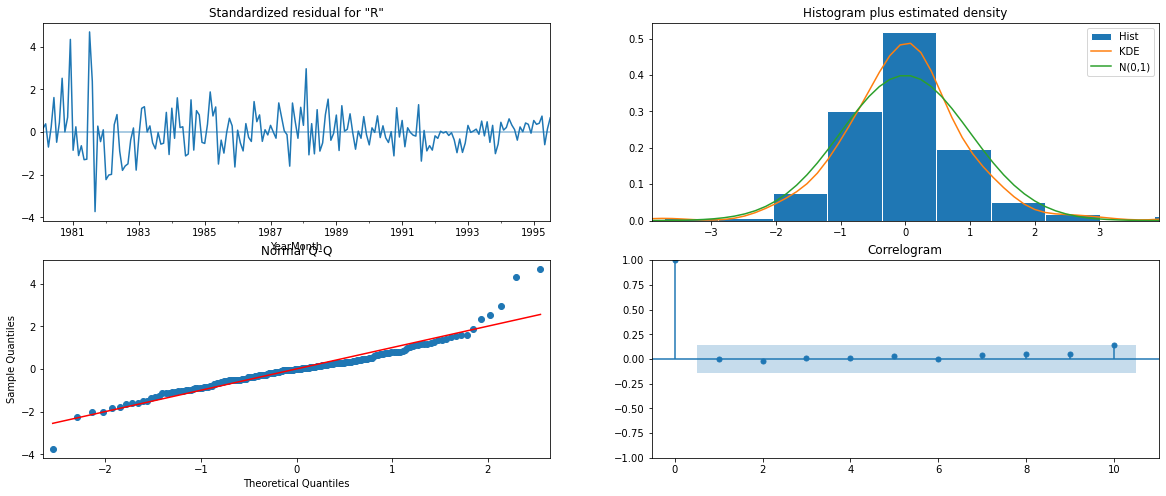

In [1418]:
import statsmodels.api as sm
#Diagnsis plotting
R_results.plot_diagnostics()
plt.show()

**Observation:** The model diagnostics plot looks okay.

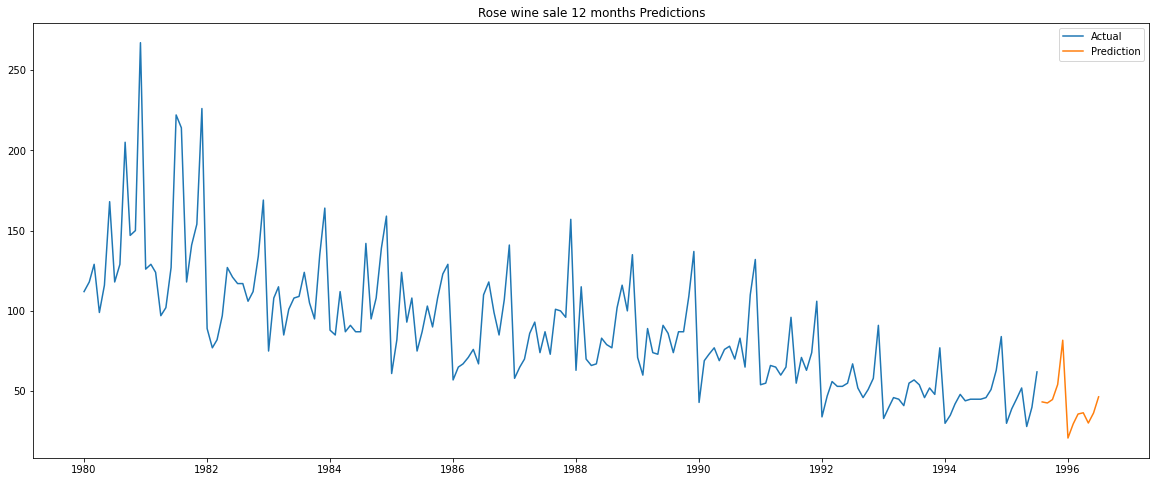

In [1420]:
#Plotting the prediction
plt.figure(figsize=(20,8))
plt.plot(rose["Rose"],label="Actual")
plt.plot(pred_12months_rose,label="Prediction")
plt.legend()
plt.title('Rose wine sale 12 months Predictions');
plt.show()

**Sparkling wine sale data:**

**Since Sparkling data set has clear component of seasonality SARIM. Therefore, SARIMA model with parameters(0,0,1)(0,1,1)[12]  is selected for forecasting time line series.**

In [1422]:
S_model = SARIMAX(sparkling["Sparkling"],order=(1,1,2),seasonal_order=(1,0,1,12))
S_results = S_model.fit()
S_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1532.670
Date:                              Sun, 04 Sep 2022   AIC                           3077.341
Time:                                      23:19:47   BIC                           3096.695
Sample:                                  01-01-1980   HQIC                          3085.184
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9580      1.333      0.719      0.472      -1.655       3.571
ma.L1         -1.9341      1.457     -1.328      0.184      -4.789       0.921
ma.L2          0.9346      1.434      0.652      0.515      -1.876       3.745
ar.S.L12       0.8962      0.168      5.346      0.000       0.568       1.225
ma.S.L12      -0.1936      0.589     -0.329      0.742      -1.348       0.961
sigma2      1.826e+06   5.58e-06   3.28e+11      0.000    1.83e+06    1.83e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.88   Jarque-Bera (JB):              2583.15
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             2.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.42e+27. Standard errors may be unstable.
"""

In [1424]:
start=len(sparkling)
end=len(sparkling)+12-1
pred_12months_sparkling=  S_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Sparkling SARIMA 12 months Predictions')

In [1425]:
pred_12months_sparkling

1995-08-01    1788.362510
1995-09-01    2701.198690
1995-10-01    3234.930098
1995-11-01    3627.652810
1995-12-01    5588.417041
1996-01-01    1265.909399
1996-02-01    1606.791928
1996-03-01    1931.627812
1996-04-01    1913.302536
1996-05-01    1763.193454
1996-06-01    1769.671889
1996-07-01    2074.065962
Freq: MS, Name: Sparkling SARIMA 12 months Predictions, dtype: float64

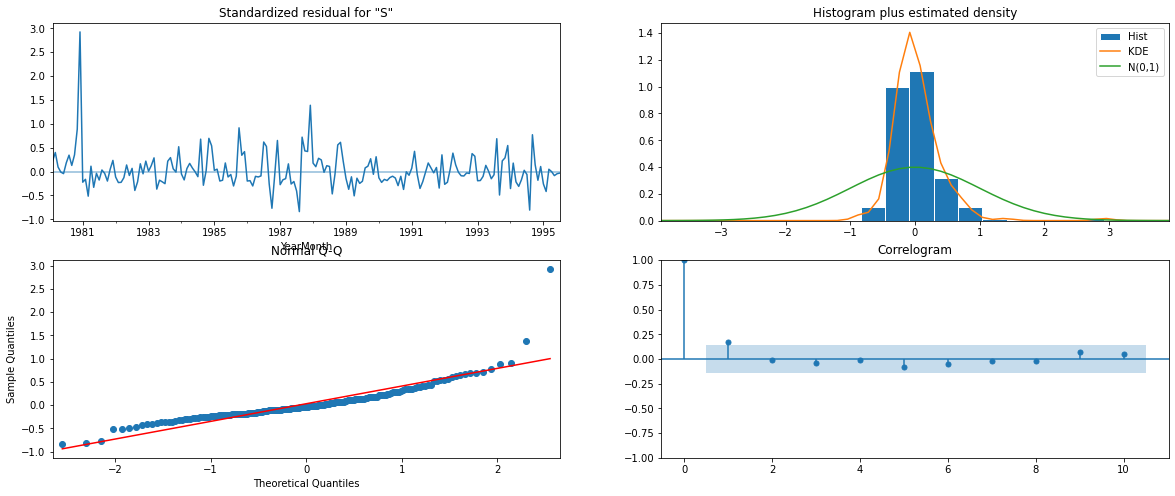

In [1426]:
#Diagnsis plotting
S_results.plot_diagnostics()
plt.show()

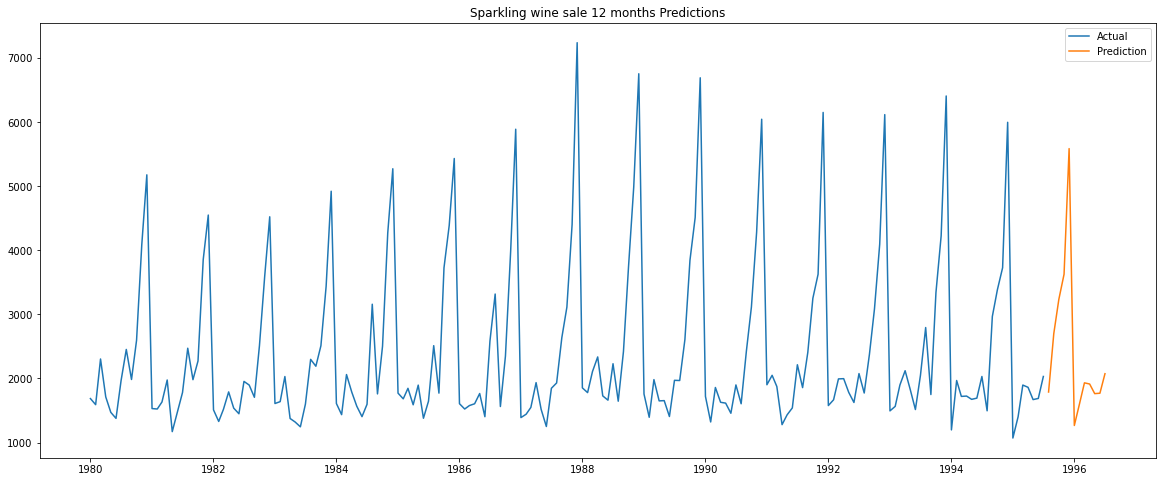

In [1427]:
#Plotting the prediction
plt.figure(figsize=(20,8))
plt.plot(sparkling["Sparkling"],label="Actual")
plt.plot(pred_12months_sparkling,label="Prediction")
plt.legend()
plt.title('Sparkling wine sale 12 months Predictions');
plt.show()

### Q10. Comment on the model thus built and report your findings and suggest the measures that thecompany should be taking for future sales.

**Insights:**
* On observing RMSE values of different types of model (Rose) that we developed such as regression (ARM), simple average models (SAM), and exponential smoothing model (ESM) on the training data, we found that SARIMAX model outperformed all the other model because it had the lowest RMSE score(considering seasonality).

* Two major observations that we see in the dataset are as follows: 
    1. The Sales of Rose wine is decreasing with time. May be the quality of the wine is decreasing or the competitors have manufactured same quality wine with low price. Hence Rose wine's company needs to develop the quality of the wine and also work on the cost of it so that customer will be inclined to buy this wine.
    2. In case of Sparkling wine the sales are following seasonal pattern but the sales value is not decreasing. It is also found that the sales of the Sparkling wine always reaches its peak at the end of the year. Hence company should work on developing marketing schemes towards the end of the year so that more customers are impelled to buy the same.

 
* Trend in sales of Rose is continuously decreasing over the period. Detailed study may be required to see whetherdecreasing trend is due to change in customer preference or due to substitution. Seasonality of sales is observed, andhigher sales is maintained in the end of the year. Some promotion schemes and improvement / quality enhancers in theproduct can be examined so as to attract new young generation customers.

* Sales in Sparking does not have uniform trend but increased in some years and decreased later. Business study may bedone to find why sales are not increasing and what the contributing factors. Study can also include to see which wineproduct has substituted/ had higher sales in the years of low sales of Sparkling. With promotion and focussed effort withmicro detailing it may be feasible to increase the sales. Sales of Sparkling wine higher in the later part of the year. Thismay be due to climatic condition of the geography under study.